# The Heat Equation
- The model problem for the time-dependent PDE reads
$$
\begin{aligned}
\frac{\partial u}{\partial t} & =k(\mathbf{x},\omega)\nabla^2 u+f & & \text { in } \Omega \times(0, T], \\
u & =u_D=0 & & \text { in } \partial \Omega \times(0, T], \\
u & =u_0 & & \text { at } t=0 .
\end{aligned}
$$
- where
    - The variable $u$ is a function of both space and time, i.e., $u = u(\mathbf{x}, t)$, where the spatial domain is denoted by $\Omega(\mathbb{R}^{2})$.
    - The thermal diffusivity $\boldsymbol{x} \in \Omega=[-2,2] \times[-2,2]\subset \mathbb{R}^2$
    - The source function $f$ and boundary values $u_D$ may also vary with space and time.
    - The initial condition $u_0$ is defined in the spatial domain $\Omega(\mathbb{R}^{2})$.<br>

<br>

## Parameter Estimation Problem - Theory

Our uncertain paramater in this case is the thermal diffusivity $k(\mathbf{x})$.
Our observations consist of noisy observations of $u(x_j,t_i)$, that is, measurements of $u$ at locations $\{x_j\}_{j=1}^M$ in space and $\{t_i\}_{i=0}^{T}$ times.
Note that our parameter is now populated with noise that may be spatially varying and correlated.
Furthermore note that our uncertain parameter is now a function, and not just simple a point, so we need an effective way of parametrizing $k(\mathbf{x})$ for parameter estimation. 
This is where the KL expansion comes in


### The KL Expansion

We can describe $k(\boldsymbol{x})$ as a stochastic process, $K(\boldsymbol{x}, \omega)$, where $K$ is a function defined on the product
space $\boldsymbol{D} \times \Omega, \boldsymbol{x} \in \boldsymbol{D}$ is the index set of the location of the physical domain, and $\theta \in \Theta$ is
the sample space of the probability space, $(\Theta, \mathcal{F}, P)$.

Given a stochastic process $K(\boldsymbol{x}_{1}, \omega)$, with mean $\mu(\boldsymbol{x})$ and symmetric positive semi- 
definite covariance function $\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right) \in \Omega \times \Omega \to 
\mathbb{R}$, the Mercer theorem states that $\boldsymbol{C}$ can be decomposed as:
$$
\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right)=\sum_{j=1}^{\infty} \lambda_j \psi_j(\boldsymbol{x}) \psi_j\left(\boldsymbol{x}_{2}\right),
$$
where $\lambda_j>0$ are the eigenvalues of $\boldsymbol{C}$, and $\psi_j$ are the corresponding normalized eigenvectors. The eigenpairs satisfy the Fredholm equation of the second kind:
$$
\int_{\Omega} \boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right) \psi_j\left(\boldsymbol{x}_{2}\right) d \boldsymbol{x}_{2}=\lambda_j \psi_j(\boldsymbol{x}_{1}), \quad j=1,2, \ldots
$$
Sequencing the eigenvalues in decreasing order, any realization of $K$ can then be written as Ghanem and Spanos (2003)
$$
K(\boldsymbol{x}, \omega)=\mu(\boldsymbol{x})+\sum_{j=1}^{\infty} \sqrt{\lambda_j} \psi_j(\boldsymbol{x}) \xi_j(\omega) .
$$
The coordinate coefficients $\xi_j(\omega)$ can be deterministically computed by evaluating the integrals
$$
\xi_j(\omega)=\int(K(\boldsymbol{x}_{1}, \omega)-\mu(\boldsymbol{x})) \psi_j(\boldsymbol{x}) d \boldsymbol{x}
$$


### KL Expansion for Gaussian Processes

In our case, note $k(\mathbf{x})$ is a Gaussian process $(G P), \xi_j(\omega)$, i.e. it is a Gaussian-independent identically distributed random variables with zero mean and unit variance, such that $\mathbb{E}\left[\xi_j \xi_j^{\prime}\right]=$ $\delta_{j j^{\prime}}$.
The parameter field $K$ is then fully characterized by a set of coordinates $\xi_j$ 's given the eigenbasis is known.
By truncating the series givn above to retain the first few $K$ terms, the KL expansion efficiently approximates the highdimensional parameter field using a few dominant modes.
The size of the retained terms $K$ depends on the desired energy percentage to be retained by the $\mathrm{KL}$ expansion, which is defined as $\sum_{j=1}^K \lambda_j / \sum_{j=1}^{\infty} \lambda_j$.
In practice, it is preferable to choose $K$ such that the truncated $\mathrm{KL}$ expansion encapsulates as much information as possible with respect to its infinite counterpart.
Larger $K$ are required for prior covariance functions with smaller correlation lengths for the $\mathrm{KL}$ expansion to capture a similar information percentage.
There exist several strategies to set $K$ in practice.
For instance, for $\lambda_1 \geq \lambda_2 \geq \ldots$, one can control the representation error on $K$ by selecting $K$ such that $\lambda_K<c \lambda_1$ or $\sum_{j=1}^K \lambda_j \leq c \sum_{j=1}^{\infty} \lambda_j$ for some truncation parameter $c \ll 1$

### Creating the Covariance Matrix

The one thing remaining is to determine the Covariance function $C(x_1, x_2)$ for determining the modes of our KL basis.
The covariance function encodes how correlated spatially we expect our function values to be.
A common kernel used as a Covariance function is based off a square exponential function.

The square exponential kernel function can be represented mathematically as:

$$C(x_i, x_j) = \exp \left( -\frac{1}{2} \sum_{d=1}^{D} \left(\frac{x_{i,d} - x_{j,d}}{\ell_d}\right)^2\right)$$

where $x_i$ and $x_j$ are two $D$-dimensional input vectors, $\ell_d$ is the length scale for dimension $d$ and $\alpha=2$ is a constant.
The covariance matrix, $C$, can be constructed by evaluating this kernel function for each pair of input points and multiplying byhe $\sigma^2$:

$$ C_{i,j} = \sigma^2 * C(x_i, x_j) $$

Note the standard deviation can be specified to be constant over the whole grid, or can be the same size of the grid and specified cell wise. 
The $\sigma$ set should be related to the expected measurement noise in the observation operator.
Note furthermore the importance of the length scale parameters $\ell_d$. 
They in a sense define how smooth we believe our kernel to be.
The large $\ell_d$, the more square exponential kernel will smooth the sum of the different components over the space since they will overlap more.
The smaller the $\ell_d$, the rougher the field we want to represent.

### Forward Model - FEM Formulation

We will use a finite element method to solve the heat equation forward model in our parameter estimation problem. 


- The finite element method is a popular approach for solving time-dependent partial differential equations (PDEs).
- A common technique for discretizing the time derivative involves a finite difference approximation, which leads to a sequence of stationary problems.
- Each of these stationary problems can then be formulated as a variational problem, leading to a set of algebraic equations to solve at each time step.
- To represent quantities at different time levels, we adopt the notation of superscript $n$, where $n$ is an integer counting time levels. For instance, $u^n$ refers to the value of the solution $u$ at time level $n$.
- In the context of finite difference discretization, the initial step involves evaluating the PDE at a particular time level, such as $t_{n+1}$. This allows us to formulate a set of equations that define the solution at the next time step.
- The time-derivative can be approximated by a difference quotient. For simplicity and stability reasons, we choose a simple backward difference, given $\Delta t$ is the time discretization parameter:

$$\left(\frac{\partial u}{\partial t}\right)^{n+1}=\nabla^2 u^{n+1}+f^{n+1} \ \implies \ \left(\frac{\partial u}{\partial t}\right)^{n+1} \approx \frac{u^{n+1}-u^n}{\Delta t}$$

- Inserting the latter expression into our equation at time step $n+1$ yields
$$
\frac{u^{n+1}-u^n}{\Delta t}= k(\mathbf{x})\nabla^2 u^{n+1}+f^{n+1} .
$$

- To solve time-dependent partial differential equations, we typically first discretize the time derivative using a finite difference approximation.
- This results in a sequence of stationary problems that can be solved iteratively to obtain the solution at each time step.
- We can reorganize the resulting equations such that the left-hand side contains only terms with the unknown value $u^{n+1}$, while the right-hand side contains only computed terms.
- This leads to a sequence of stationary problems for $u^{n+1}$, which can be solved assuming that the value of $u^n$ is known from the previous time step.
$$
\begin{aligned}
u^0 & =u_0 \\
u^{n+1}-\Delta t k(\mathbf{x}) \nabla^2 u^{n+1} & =u^n+\Delta t f^{n+1}, \quad n=0,1,2, \ldots
\end{aligned}
$$
Hence given $u_0$, we can iterativly solve $u^0, u^1, u^2, \dots$

- After discretizing the time derivative using a finite difference approximation, we can solve the resulting sequence of stationary problems using the finite element method.
- To do this, we first transform the equation into its weak formulation.
- We do this by multiplying the equation by a test function $v \in \hat{V}$ and integrating the second-order derivatives by parts.
- We then introduce the symbol $u$ to represent the unknown value $u^{n+1}$, and we write the resulting weak formulation in terms of $u$ and $v$.
$$
a(u, v)=L_{n+1}(v),
$$
where
$$
\begin{aligned}
a(u, v) & =\int_{\Omega}(u v+\Delta t k(\mathbf{x}) \nabla u \cdot \nabla v) \mathrm{d} x \\
L_{n+1}(v) & =\int\left(u^n+\Delta t f^{n+1}\right) \cdot v \mathrm{~d} x
\end{aligned}
$$

## Simple Example Solving

The `HeatModel` class allows us to define the parameters of the heat model.

Lets start with a constant $k(\mathbf{x})$ over the space.
Note we define it as a product of two variables, x and y, corresponding to the (x,y) coordinate of each grid point in the grid to compute the thermal diffusivity over.

## True k(x) fields

### Test Function 

We make assumptions $\mu_{therm} = 2.0$ and $\xi = 0.5$ for the thermal mean and noise of the true field respectively. 

Now consider the test functions:

- Functional form of $k(x)$:
$$k(\boldsymbol{x}) = \mu_{therm} + (\mu_{therm} * \xi) \sin(\boldsymbol{x}_{0}-1.0)\cos(\boldsymbol{x}_{1} - 1.0)* \exp\left[-2 \left( \left(\frac{\boldsymbol{x}_{0}-1.0}{\sigma}\right)^{2} + \left(\frac{\boldsymbol{x}_{1}-1.0}{\sigma}\right)^{2} \right) \right].$$

- Constant form of $k(x)$:
$$ k(\boldsymbol{x}) = \mu_{therm} + (\mu_{therm} * 0.1 * \varepsilon ) * \mathbf{1} \quad \text{with } \mathbf{1}\in \mathbb{R}^{N}, \ \varepsilon \sim \mathcal{N}(0,1)$$



## Initial Conditions

- First Initial Condition: 
$$\exp\left[-\frac{1}{2} \left(\left(\frac{\boldsymbol{x}_{0}-0.01}{5}\right)^{2} + \left(\frac{\boldsymbol{x}_{1}-0.01}{5}\right)^{2} \right) \right]$$
- Second Inital Condition:
$$2* \exp\left[-0.1\left( \left(\boldsymbol{x}_{0}-1.0\right)^{2} + \left(\boldsymbol{x}_{1}-1.0\right)^{2} \right) \right]$$

### Forming Problem

In [13]:
from pydci.examples.heat_model import HeatModel
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from pydci import OfflineSequential, OnlineSequential
from pydci.log import enable_log, disable_log
from pydci.utils import get_df, set_seed


In [14]:
therm_mean = 1
noise = 0.1


def init_cond(x):
    return np.exp(-0.5 * ((x[0] - 0.01) / 5) ** 2 + ((x[1] + 0.01) / 5) ** 2)


def init_cond(x):
    return 2.0 * np.exp(-0.1 * ((x[0] - 1.0) ** 2 + (x[1] - 1.0) ** 2))


def const_k(x):
    """
    Constant k(x)
    """
    m = therm_mean + therm_mean * noise * np.random.randn(1)
    return m * np.ones(x[0].shape)


def test_fun(x):
    """
    Functional k(x) that varies with x
    """
    scale = 10.0
    center = [1.0, 1.0]
    m = therm_mean * noise  # * np.random.randn(1)
    init = therm_mean + m * np.sin(x[0] - center[0]) * np.cos(
        x[1] - center[1]
    ) * np.exp(
        -2.0 * (((x[0] - center[0]) / scale) ** 2 + ((x[1] - center[1]) / scale) ** 2)
    )
    return init

## No Forcing

In [3]:
enable_log(level="DEBUG")
hm1 = HeatModel(
    x0=None,
    measurement_noise=0.05,
    solve_ts=0.0001,
    sample_ts=0.1,
    nx=50,
    ny=50,
    mean=1.0,
    std_dev=1.0,
    length_scales=[0.1, 0.1],
    nmodes=4,
    true_k_x=None,
    max_states=500,
)

[08/08/23 12:47:36] INFO     Logger initialized                                                           ]8;id=478171;file:///Users/carlos/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=371988;file:///Users/carlos/repos/pyDCI/src/pydci/log.py#80\80]8;;\

                    DEBUG    Setting up simulation                                                 ]8;id=122249;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=260939;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#97\97]8;;\

[08/08/23 12:47:41] DEBUG    State idxs set at 500 of 2601 total indices                                ]8;id=38196;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=291415;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#99\99]8;;\

In [4]:
hm1.lam_true

array([-2.47482849, -0.96762442,  0.9817065 , -1.33815796])

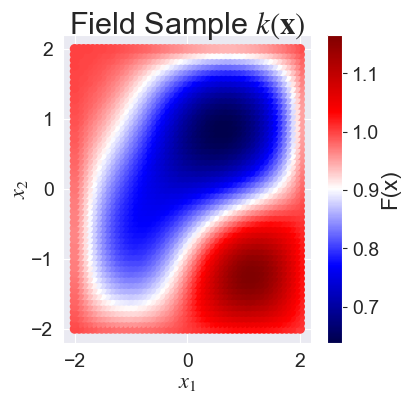

In [5]:
hm1.plot_field()

In [6]:
hm1.get_data(1.0)

[08/08/23 12:47:42] INFO     Getting data for model from 1.0 to 1.4                                    ]8;id=876103;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=167195;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#354\354]8;;\

                    DEBUG    Constructing k_x field                                               ]8;id=399127;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=586684;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#259\259]8;;\

                    DEBUG    Assembling bilinear form                                             ]8;id=680222;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=831849;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#265\265]8;;\

                    DEBUG    Assembling linear form                                               ]8;id=224995;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=612838;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#275\275]8;;\

                    DEBUG    Initializing solver                                                  ]8;id=168943;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=535030;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#290\290]8;;\

[08/08/23 12:47:45] DEBUG    Shapes: (3999, 500), (3999, 2601), (3999,)                                ]8;id=499097;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=302599;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#369\369]8;;\

## Spatially and time varying forcing function

In [7]:
from pydci.examples.heat_model import HeatModel
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from pydci import OfflineSequential, OnlineSequential
from pydci.log import enable_log, disable_log
from pydci.utils import get_df, set_seed

class ForcingFunction:
    def __init__(self):
        self.t = 0.0

    def eval(self, x):
        # Added some spatial variation here. Expression is sin(t)*x
        return np.full(
            x.shape[1],
            6 * np.sin(2 * np.pi * self.t) * x[0]
            + 2 * np.cos(6 * np.pi * self.t) * x[1],
        )

set_seed(123)
enable_log(level="DEBUG")
hm2 = HeatModel(
    x0=None,
    measurement_noise=0.05,
    solve_ts=0.0001,
    sample_ts=0.1,
    nx=50,
    ny=50,
    mean=1.0,
    std_dev=1.0,
    length_scales=[0.1, 0.1],
    nmodes=4,
    true_k_x=None,
    max_states=500,
    forcing_expression=ForcingFunction(),
)

[08/08/23 12:47:54] INFO     Logger initialized                                                           ]8;id=475705;file:///Users/carlos/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=389812;file:///Users/carlos/repos/pyDCI/src/pydci/log.py#80\80]8;;\

                    DEBUG    Setting up simulation                                                 ]8;id=423806;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=34799;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#97\97]8;;\

[08/08/23 12:47:58] DEBUG    State idxs set at 500 of 2601 total indices                                ]8;id=599287;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=121950;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#99\99]8;;\

In [8]:
hm2.get_data(t0=0.0, tf=1.0)

[08/08/23 12:48:00] INFO     Getting data for model from 0.0 to 1.0                                    ]8;id=799040;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=163526;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#354\354]8;;\

                    DEBUG    Constructing k_x field                                               ]8;id=543491;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=467825;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#259\259]8;;\

                    DEBUG    Assembling bilinear form                                             ]8;id=774687;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=897078;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#265\265]8;;\

                    DEBUG    Assembling linear form                                               ]8;id=570730;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=432824;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#275\275]8;;\

                    DEBUG    Initializing solver                                                  ]8;id=100558;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=448619;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#290\290]8;;\

[08/08/23 12:48:13] DEBUG    Shapes: (10000, 500), (10000, 2601), (10000,)                             ]8;id=656521;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=995774;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#369\369]8;;\

In [3]:
hm2.data[0]

ts  shift_idx  sample_flag  lam_true_0  q_lam_true_0  q_lam_true_1  \
0     0.0000          0         True   -1.085631  2.037954e-17  4.248354e-18   
1     0.0001          0        False   -1.085631  0.000000e+00  0.000000e+00   
2     0.0002          0        False   -1.085631  0.000000e+00  0.000000e+00   
3     0.0003          0        False   -1.085631  0.000000e+00  0.000000e+00   
4     0.0004          0        False   -1.085631  0.000000e+00  0.000000e+00   
...      ...        ...          ...         ...           ...           ...   
9995  0.9996          0        False   -1.085631  0.000000e+00  0.000000e+00   
9996  0.9997          0        False   -1.085631  0.000000e+00  0.000000e+00   
9997  0.9998          0        False   -1.085631  0.000000e+00  0.000000e+00   
9998  0.9999          0        False   -1.085631  0.000000e+00  0.000000e+00   
9999  1.0000          0         True   -1.085631  0.000000e+00  0.000000e+00   

      q_lam_true_2  q_lam_true_3  q_lam_true_4  q_lam_true_5  ...  \
0     2.037954e-17  9.776158e-17  9.170085e-17  9.170085e-17  ...   
1     0.000000e+00 -5.765875e-04  0.000000e+00  0.000000e+00  ...   
2     0.000000e+00 -1.113291e-03  0.000000e+00  0.000000e+00  ...   
3     0.000000e+00 -1.614504e-03  0.000000e+00  0.000000e+00  ...   
4     0.000000e+00 -2.083998e-03  0.000000e+00  0.000000e+00  ...   
...            ...           ...           ...           ...  ...   
9995  0.000000e+00 -4.861025e-02  0.000000e+00  0.000000e+00  ...   
9996  0.000000e+00 -4.857169e-02  0.000000e+00  0.000000e+00  ...   
9997  0.000000e+00 -4.853303e-02  0.000000e+00  0.000000e+00  ...   
9998  0.000000e+00 -4.849428e-02  0.000000e+00  0.000000e+00  ...   
9999  0.000000e+00 -4.845544e-02  0.000000e+00  0.000000e+00  ...   

      q_lam_obs_490  q_lam_obs_491  q_lam_obs_492  q_lam_obs_493  \
0          -0.04668      -0.006919      -0.057921      -0.003284   
1               NaN            NaN            NaN            NaN   
2               NaN            NaN            NaN            NaN   
3               NaN            NaN            NaN            NaN   
4               NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
9995            NaN            NaN            NaN            NaN   
9996            NaN            NaN            NaN            NaN   
9997            NaN            NaN            NaN            NaN   
9998            NaN            NaN            NaN            NaN   
9999        0.32279       0.412982       0.038983       0.463693   

      q_lam_obs_494  q_lam_obs_495  q_lam_obs_496  q_lam_obs_497  \
0          0.051314      -0.013688       0.054905       0.041859   
1               NaN            NaN            NaN            NaN   
2               NaN            NaN            NaN            NaN   
3               NaN            NaN            NaN            NaN   
4               NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
9995            NaN            NaN            NaN            NaN   
9996            NaN            NaN            NaN            NaN   
9997            NaN            NaN            NaN            NaN   
9998            NaN            NaN            NaN            NaN   
9999       0.425578       0.180036       0.032249       0.152945   

      q_lam_obs_498  q_lam_obs_499  
0          0.025693       0.009283  
1               NaN            NaN  
2               NaN            NaN  
3               NaN            NaN  
4               NaN            NaN  
...             ...            ...  
9995            NaN            NaN  
9996            NaN            NaN  
9997            NaN            NaN  
9998            NaN            NaN  
9999       0.032952      -0.063265  

[10000 rows x 3105 columns]

### Visualizing using pyvista

In [3]:
snapshots = hm2.take_snaps(hm2.data[0], sample_ts=0.01)
hm2.output_gif(snapshots, gif_name="../figures/u_time_forced_true.gif")
Image(url="../figures/u_time_forced_true.gif")

|███████████████████████████████████████▋⚠︎ (!) 99/100 [99%] in 8.9s (11.12/s)                                           


## Parameter Estimation Problem - 4 Dimensional

In [4]:
hm2.lam_true

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471])

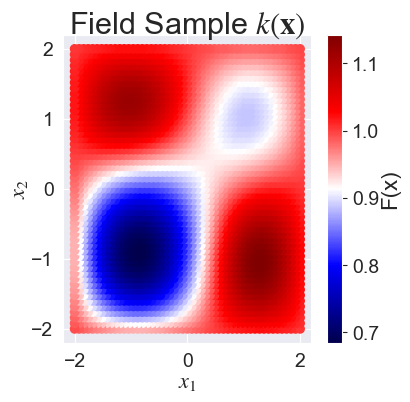

In [5]:
hm2.plot_field()

In [7]:
hm2.save('hm.h5')

[08/07/23 09:55:47] DEBUG    Saving data as DataFrame                                                  ]8;id=200257;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=387243;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#224\224]8;;\

your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->values] [items->None]

  store.put("__attrs__", pd.Series(info_dict))



In [9]:
from pydci.examples.heat_model import HeatModel
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from pydci import OfflineSequential, OnlineSequential
from pydci.log import enable_log, disable_log
from pydci.utils import get_df, set_seed

class ForcingFunction:
    def __init__(self):
        self.t = 0.0

    def eval(self, x):
        # Added some spatial variation here. Expression is sin(t)*x
        return np.full(
            x.shape[1],
            6 * np.sin(2 * np.pi * self.t) * x[0]
            + 2 * np.cos(6 * np.pi * self.t) * x[1],
        )
 
# disable_log()
enable_log(level='INFO')
hm = HeatModel(
    x0=None,
    measurement_noise=0.05,
    solve_ts=0.0001,
    sample_ts=0.1,
    nx=50,
    ny=50,
    mean=1.0,
    std_dev=1.0,
    length_scales=[0.1, 0.1],
    nmodes=4,
    true_k_x=None,
    max_states=500,
    forcing_expression=ForcingFunction(),
    model_file='hm.h5'
)


[08/08/23 12:48:33] INFO     Logger initialized                                                           ]8;id=561995;file:///Users/carlos/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=176864;file:///Users/carlos/repos/pyDCI/src/pydci/log.py#80\80]8;;\

                    INFO     Loading model state from state file at                                    ]8;id=64112;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=259243;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#162\162]8;;\
                             /Users/carlos/repos/pyDCI/notebooks/Examples/hm.h5                                    

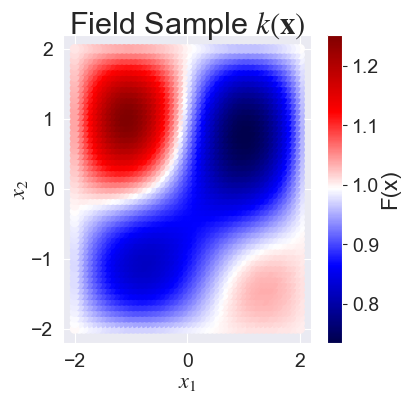

In [10]:
hm.plot_field()

In [11]:
hm.samples[0]

lam_0     lam_1     lam_2     lam_3   q_lam_0   q_lam_1   q_lam_2  \
0   2.398402  0.209391  0.339257  0.363429 -0.006164  0.038008  0.054501   
1   0.159622  0.640704  0.921266  0.530817 -0.048342  0.034963 -0.023503   
2   2.709764  0.172250 -0.511626  1.658605  0.029461 -0.019512 -0.019549   
3  -0.644560  0.510139  1.868396 -0.407551  0.112805  0.067712 -0.174210   
4   1.715961  0.291900  0.260809  0.723999 -0.070374 -0.035234  0.105442   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.578346  0.511904  0.410250 -0.023589  0.005691  0.061258  0.023504   
96  0.534866  0.330758  0.984021  1.718588 -0.009682 -0.034862 -0.073485   
97  0.603362  2.865804  1.617897  0.474221 -0.056303  0.059851 -0.048947   
98  0.790767  0.927379 -1.376941  0.398223 -0.088638 -0.025547  0.109583   
99  0.046162 -1.866232 -0.819956  0.942569  0.026132 -0.017117 -0.002526   

     q_lam_3   q_lam_4   q_lam_5  ...  q_lam_5490  q_lam_5491  q_lam_5492  \
0   0.035192 -0.112345 -0.020241  ...    0.468623    0.414600         0.0   
1  -0.021415 -0.077902 -0.111201  ...    0.478693    0.422365         0.0   
2   0.010250 -0.069148 -0.068142  ...    0.474737    0.419470         0.0   
3   0.042427  0.004928 -0.020097  ...    0.477728    0.421531         0.0   
4   0.025105 -0.024265 -0.064517  ...    0.473163    0.418162         0.0   
..       ...       ...       ...  ...         ...         ...         ...   
95  0.041205 -0.053393 -0.001287  ...    0.471113    0.416376         0.0   
96 -0.054101 -0.030356 -0.013231  ...    0.490788    0.431936         0.0   
97  0.017549 -0.061712 -0.044626  ...    0.478933    0.422166         0.0   
98 -0.052919  0.031496  0.132473  ...    0.457953    0.405901         0.0   
99 -0.020650 -0.054996 -0.009064  ...    0.474199    0.419288         0.0   

    q_lam_5493  q_lam_5494  q_lam_5495  q_lam_5496  q_lam_5497  q_lam_5498  \
0     0.381878    0.161837         0.0         0.0    0.205124         0.0   
1     0.388675    0.163376         0.0         0.0    0.207487         0.0   
2     0.386230    0.163006         0.0         0.0    0.206799         0.0   
3     0.387876    0.163054         0.0         0.0    0.207090         0.0   
4     0.385003    0.162607         0.0         0.0    0.206249         0.0   
..         ...         ...         ...         ...         ...         ...   
95    0.383371    0.161975         0.0         0.0    0.205497         0.0   
96    0.397095    0.165537         0.0         0.0    0.210572         0.0   
97    0.388755    0.163300         0.0         0.0    0.207628         0.0   
98    0.374306    0.159659         0.0         0.0    0.202275         0.0   
99    0.385739    0.162796         0.0         0.0    0.206358         0.0   

    q_lam_5499  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
..         ...  
95         0.0  
96         0.0  
97         0.0  
98         0.0  
99         0.0  

[100 rows x 5504 columns]

In [12]:
import pandas as pd
from pydci.utils import get_search_combinations

search_list = get_search_combinations(
    prob.get_num_measurements(0),
    prob.n_params,
    len(prob.model.samples[0]),
)
pd.DataFrame(search_list)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>                                                                                      │
│                                                                                                  │
│    2 from pydci.utils import get_search_combinations                                             │
│    3                                                                                             │
│    4 search_list = get_search_combinations(                                                      │
│ ❱  5 │   prob.get_num_measurements(0),                                                           │
│    6 │   prob.n_params,                                                                          │
│    7 │   len(prob.model.samples[0]),                                                             │
│    8 )                                                                                           │
│                                                                                                  │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │                 const_k = <function const_k at 0x14fc0e5f0>                                  │ │
│ │             disable_log = <function disable_log at 0x12d6ab400>                              │ │
│ │              enable_log = <function enable_log at 0x12d6ab370>                               │ │
│ │                    exit = <IPython.core.autocall.ZMQExitAutocall object at 0x103ed8ac0>      │ │
│ │         ForcingFunction = <class '__main__.ForcingFunction'>                                 │ │
│ │                  get_df = <function get_df at 0x12d6d8040>                                   │ │
│ │             get_ipython = <bound method InteractiveShell.get_ipython of                      │ │
│ │                           <ipykernel.zmqshell.ZMQInteractiveShell object at 0x103ed8220>>    │ │
│ │ get_search_combinations = <function get_search_combinations at 0x12d6d8280>                  │ │
│ │               HeatModel = <class 'pydci.examples.heat_model.HeatModel'>                      │ │
│ │                      hm = <pydci.examples.heat_model.HeatModel object at 0x14fe87010>        │ │
│ │                     hm1 = <pydci.examples.heat_model.HeatModel object at 0x10402d2d0>        │ │
│ │                     hm2 = <pydci.examples.heat_model.HeatModel object at 0x14fc2b9d0>        │ │
│ │                   Image = <class 'IPython.core.display.Image'>                               │ │
│ │                      In = [                                                                  │ │
│ │                           │   '',                                                            │ │
│ │                           │   'from pydci.examples.heat_model import HeatModel\nimport numpy │ │
│ │                           as np\nimport matplo'+194,                                         │ │
│ │                           │   'therm_mean = 1\nnoise = 0.1\n\n\ndef init_cond(x):\n          │ │
│ │                           return np.exp(-0.5 * ((x[0] -'+663,                                │ │
│ │                           │   'enable_log(level="DEBUG")\nhm1 = HeatModel(\n    x0=None,\n   │ │
│ │                           measurement_noise=0.'+181,                                         │ │
│ │                           │   'hm1.lam_true',                                                │ │
│ │                           │   'hm1.plot_field()',                                            │ │
│ │                           │   'hm1.get_data(1.0)',                                           │ │
│ │                           │   'from pydci.examples.heat_model import HeatModel\nimport numpy │ │
│ │                           as np\nimport matplo'+835,                                         │ │
│ │                           │   'hm2.get_data(t0=0.0, tf=1.

In [42]:
# Solve using 1 principal component, 1 split, and all data
search_list = [
    {'exp_thresh': 1e10,
     'pca_components': [[0]],
     'pca_mask': None,
     'pca_splits': 1,
    }
]

In [43]:
import pydci.consistent_bayes.OfflineSequentialSearch as oss
import importlib
importlib.reload(oss)

data_idx = 0
search_prob = oss.OfflineSequentialSearch(
    prob.model.samples[data_idx],
    prob.model.data[data_idx],
    prob.model.measurement_noise,
    pi_in=pi_in,
)
solve_args = dict(
    search_list=search_list,
    serach_comb_args=None,
    exp_thresh = 1e10,
    best_method = "closest",
    pi_in=pi_in,
)
search_prob.solve(**solve_args)
search_prob.search_results

[08/08/23 06:52:10] INFO     Searching through combinations:                         ]8;id=119990;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OfflineSequentialSearch.py\OfflineSequentialSearch.py]8;;\:]8;id=933399;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OfflineSequentialSearch.py#158\158]8;;\
                                  exp_thresh pca_components pca_mask  pca_splits                                   
                             0  1.000000e+10          [[0]]     None           1                                   

Solving for different combinations |                                        | ▁▃▅ 0/1 [0%] in 0s (~0s, 0.0/s) 

Solving for different combinations |                                        | ▂▄▆ 0/1 [0%] in 0s (~0s, 0.0/s) 

                    INFO     Iteration 0: Solving using (range(0, 5500), [0])              ]8;id=305159;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OfflineSequential.py\OfflineSequential.py]8;;\:]8;id=394344;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OfflineSequential.py#188\188]8;;\

on 0: WARNING:py.warnings:/Users/carlos/.mm/envs/fenics/lib/python3.10/site-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
        pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


Solving for different combinations |████████████████████████████████████████| 1/1 [100%] in 0.4s (2.23/s)               


e_r  kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3  MUD_idx  \
0  0.0 NaN   2.398402   0.209391   0.339257   0.363429        0   

  pca_components  num_splits  search_index  predict_delta  within_thresh  \
0            [0]           1             0            1.0           True   

   closest  max_kl  min_kl  
0     True   False   False

In [24]:
prob.search_results

e_r  kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3  MUD_idx  \
0  0.0 NaN   2.398402   0.209391   0.339257   0.363429        0   
0  0.0 NaN   2.398402   0.209391   0.339257   0.363429        0   

  pca_components  num_splits  search_index  predict_delta  within_thresh  \
0            [0]           1             0            1.0          False   
0         [0, 1]           1            10            1.0          False   

   closest  max_kl  min_kl  
0    False   False   False  
0    False   False   False

In [19]:
from pydci.utils import get_search_combinations

get_search_combinations(
    len(self.meas)
    100, 10, 1000, max_num_combs=20)

ImportError: cannot import name 'get_search_combinations' from 'pydci.utils' (/Users/carlos/repos/pyDCI/src/pydci/utils.py)

In [16]:
search_combs = {
    'exp_thresh': 1e10,
    'max_nc': 3,
    'all_data': True,
    'split_range': range(0, 10, 2)
}
solve_args = {'exp_thresh': 0.3, 'search_list': search_list}
enable_log(level='INFO', file='heat_solve.log')
prob.solve_till_thresh(
    0,
    start_sample_size=100,
    max_samples=200,
    samples_inc=20,
    pi_in=None,
    sampling_args={'mean': 1.0, 'std_dev': 1.0},
    solve_args=solve_args,
)

Solving for different combinations |⚠︎                                       | (!) 0/4 [0%] in 0.5s (0.00/s)             


AttributeError: 'str' object has no attribute 'update'

In [11]:
prob.model.save('hm.h5')

your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->values] [items->None]

  store.put("__attrs__", pd.Series(info_dict))



In [9]:
num_samples = 100
pi_in, samples = hm2.get_normal_initial_samples(num_samples=num_samples)
samples.shape

(100, 4)

In [10]:
disable_log()
hm2.forward_solve(samples, restart=True)

In [59]:
measurements = get_df(hm2.data[0].dropna(), "q_lam_obs", hm2.n_sensors)
measurements, measurements.shape

(array([[ 0.05388106,  0.00039901, -0.08511962, ...,  0.05107824,
          0.05304891,  0.0873647 ],
        [ 0.12020283,  0.14380145,  0.08703669, ..., -0.15015633,
          0.03480773, -0.13624253],
        [ 0.21888024,  0.25118357,  0.21733671, ..., -0.27789261,
         -0.15584626, -0.00946511],
        ...,
        [-0.22579653, -0.1869436 , -0.14663122, ...,  0.1933766 ,
          0.20073965, -0.02020877],
        [-0.16876127, -0.15245744, -0.1554438 , ...,  0.0446893 ,
          0.04515602,  0.05520697],
        [-0.06368514, -0.09739765, -0.19448661, ...,  0.15959087,
          0.07933409,  0.08884999]]),
 (11, 500))

In [71]:
disable_log()
prob = OfflineSequential(
    hm2.samples[0], measurements.ravel(), hm2.measurement_noise, pi_in=pi_in
)
prob.solve(pca_components=[[0]], pca_splits=2, exp_thresh=1e10)
prob.result

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3  MUD_idx  \
0  0.771526  6.217966   0.281513   1.140067   -0.08069  -1.713102       57   

  pca_components  num_splits  
0            [0]           2

  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,

  c *= np.true_divide(1, fact)



ValueError: array must not contain infs or NaNs

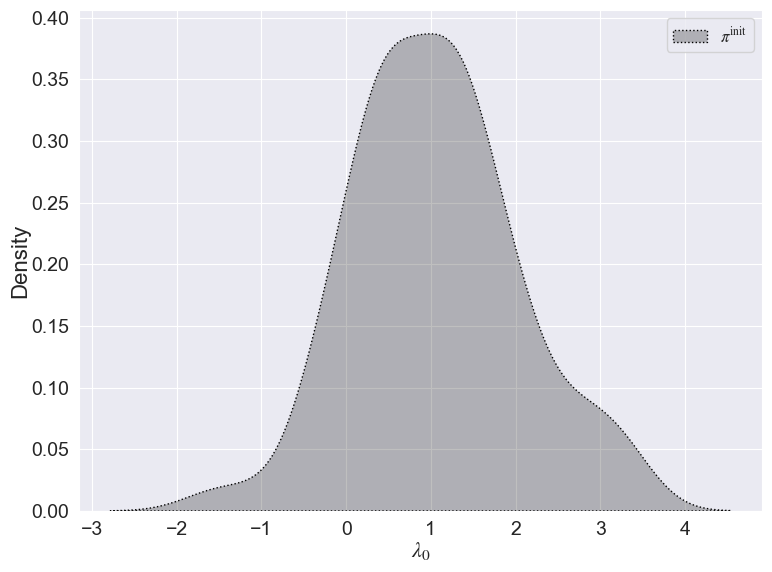

In [70]:
prob.plot_iterations(lam_true=[hm2.lam_true])

In [27]:
prob.mud_point

array([ 0.28151347,  1.14006745, -0.08069004, -1.71310199])

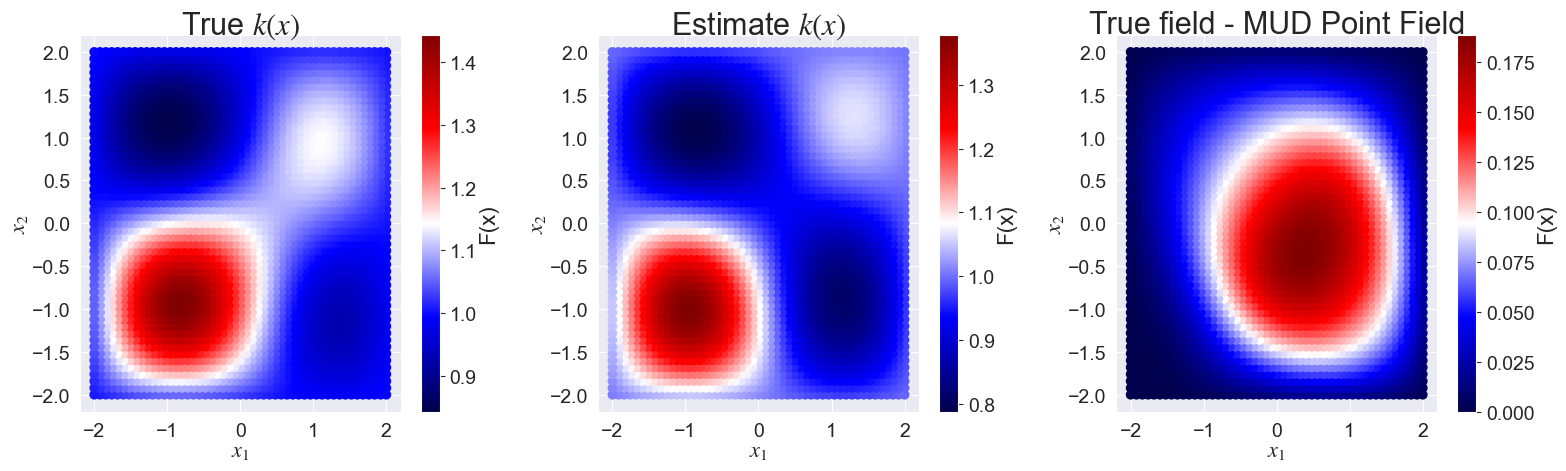

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

hm2.plot_field(ax=ax[0])
ax[0].set_title("True $k(x)$")
hm2.plot_field(field=prob.mud_point, ax=ax[1])
ax[1].set_title("Estimate $k(x)$")
hm2.plot_field(diff=prob.mud_point, ax=ax[2])
ax[2].set_title("True field - MUD Point Field")

fig.tight_layout()

## Second Iteration

In [29]:
hm2.get_data(1.0)

In [31]:
num_samples = 100
samples_1 = prob.sample_dist(num_samples=num_samples)
pi_up_1 = prob.dists["pi_up"]
samples_1.shape

(100, 4)

In [32]:
disable_log()
hm2.forward_solve(samples_1, restart=True)

In [33]:
measurements = get_df(hm2.data[-1].dropna(), "q_lam_obs", hm2.n_sensors)
measurements, measurements.shape

(array([[-0.11259528, -0.17947601, -0.15307315, ...,  0.06837078,
          0.01200697, -0.11790626],
        [ 0.05210833,  0.07083338,  0.01031819, ..., -0.05684411,
         -0.05919235, -0.10119049],
        [ 0.18342016,  0.24107654,  0.2087223 , ..., -0.215004  ,
          0.01506741,  0.07306923],
        ...,
        [-0.15647908, -0.22096363, -0.28701788, ...,  0.26512085,
          0.05967818, -0.04785114],
        [-0.11123512, -0.10704408, -0.13067355, ...,  0.17179913,
         -0.05096112, -0.01301608],
        [-0.06873262, -0.07762806, -0.1615912 , ...,  0.18042091,
         -0.02719195,  0.01954276]]),
 (11, 500))

In [53]:
disable_log()
prob = OfflineSequential(
    hm2.samples[1], measurements.ravel(), hm2.measurement_noise, pi_in=pi_in
)
prob.solve(pca_components=[[0, 1]], pca_splits=10, exp_thresh=1e10)
prob.result

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3  MUD_idx  \
0  0.8233  0.562814   0.290852   0.961946  -0.137489  -1.688744        3   

  pca_components  num_splits  
0         [0, 1]          10

In [58]:
prob.mud_point, hm2.lam_true

(array([ 0.29085227,  0.96194567, -0.13748922, -1.68874395]),
 array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471]))

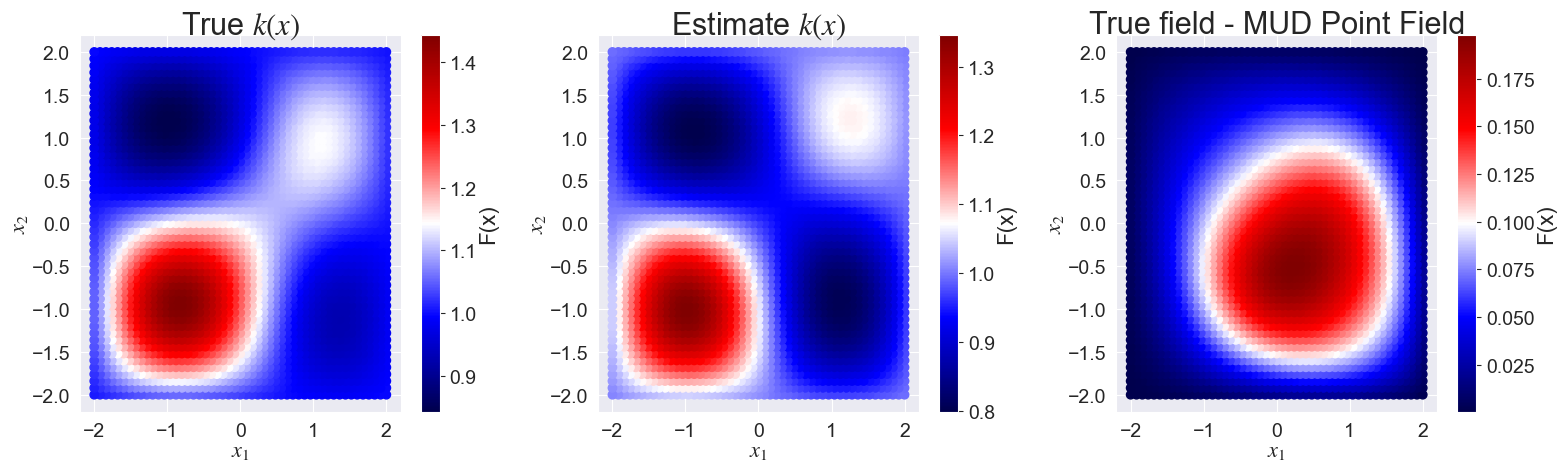

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

hm2.plot_field(ax=ax[0])
ax[0].set_title("True $k(x)$")
hm2.plot_field(field=prob.mud_point, ax=ax[1])
ax[1].set_title("Estimate $k(x)$")
hm2.plot_field(diff=prob.mud_point, ax=ax[2])
ax[2].set_title("True field - MUD Point Field")

fig.tight_layout()

## Online sequential solve

In [3]:
from pydci.examples.heat_model import HeatModel
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from pydci import PCAMUDProblem
from pydci.log import enable_log, disable_log
from pydci.utils import get_df, set_seed

set_seed(123)


class ForcingFunction:
    def __init__(self):
        self.t = 0.0

    def eval(self, x):
        # Added some spatial variation here. Expression is sin(t)*x
        return np.full(
            x.shape[1],
            6 * np.sin(2 * np.pi * self.t) * x[0]
            + 2 * np.cos(6 * np.pi * self.t) * x[1],
        )


enable_log(level="DEBUG")
hm = HeatModel(
    x0=None,
    t0=0.0,
    measurement_noise=0.05,
    solve_ts=0.0001,
    sample_ts=0.1,
    nx=50,
    ny=50,
    mean=1.0,
    std_dev=1.0,
    length_scales=[0.1, 0.1],
    nmodes=4,
    true_k_x=None,
    max_states=500,
    forcing_expression=ForcingFunction(),
)

[08/02/23 13:55:37] INFO     Logger initialized                                                           ]8;id=295600;file:///Users/carlos/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=666177;file:///Users/carlos/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    DEBUG    Setting up simulation                                                 ]8;id=321777;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=90567;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#91\91]8;;\

[08/02/23 13:55:53] DEBUG    State idxs set at: None                                                    ]8;id=930142;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=700109;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#90\90]8;;\

In [14]:
import importlib
import pydci.consistent_bayes.OnlineSequential as os

importlib.reload(os)
prob = os.OnlineSequential(
    hm,
    def_init="normal",
)

In [16]:
enable_log(level="INFO")
# prob.solve(
#     max_t=1,
#     num_samples=10,
#     time_step=1,
#     exp_thresh=0.5,
#     kl_thresh=4.5,
#     comb_args={
#         'max_nc': 2,
#         'exp_thresh': 1e10,
#         'split_range': [1, 2],
#     },
#     search_args={
#         'exp_thresh': 1e10,
#         'best_method': 'closest',
#     },
#     sampling_args={
#         'mean': 1.0,
#         'std_dev': 1.0,
#     }
# )

[08/02/23 15:26:12] INFO     Logger initialized                                                           ]8;id=296118;file:///Users/carlos/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=503838;file:///Users/carlos/repos/pyDCI/src/pydci/log.py#78\78]8;;\

<loguru.logger handlers=[(id=3, level=20, sink=<RichHandler (NOTSET)>)]>

## Iterative Breakdwon

In [20]:
measurements = get_df(hm2.data[-1].dropna(), "q_lam_obs", hm2.n_sensors)
measurements, measurements.shape

(array([[-0.0503295 ,  0.04333017,  0.01859238, ..., -0.09026164,
          0.01672525, -0.03757275],
        [ 0.11129165,  0.02183807,  0.05497946, ..., -0.08927662,
         -0.03069886, -0.09858796],
        [ 0.36503246,  0.20933543,  0.30617139, ..., -0.3867091 ,
          0.03155849, -0.25270547],
        ...,
        [-0.49835249, -0.36362105, -0.50400411, ...,  0.50715134,
         -0.00785971,  0.24784683],
        [-0.27162777, -0.18832302, -0.31768101, ...,  0.3602917 ,
          0.06235934,  0.14456361],
        [-0.13244838, -0.03995926, -0.14832467, ...,  0.15198369,
         -0.05855545, -0.00311293]]),
 (11, 500))

In [21]:
disable_log()
prob = PCAMUDProblem(
    hm2.samples[-1], measurements.ravel(), hm2.measurement_noise, pi_in=pi_in
)
prob.solve_it(pca_components=[[0]], pca_splits=10, exp_thresh=1e10)
prob.result

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3  MUD_idx  \
0  2.792011  2.155546   0.935686    0.21199  -0.225779  -0.405773       97   

  pca_components           pca_mask  i  
0            [0]  range(4950, 5500)  9

In [22]:
prob.mud_point

array([ 0.93568636,  0.21198978, -0.22577909, -0.40577332])

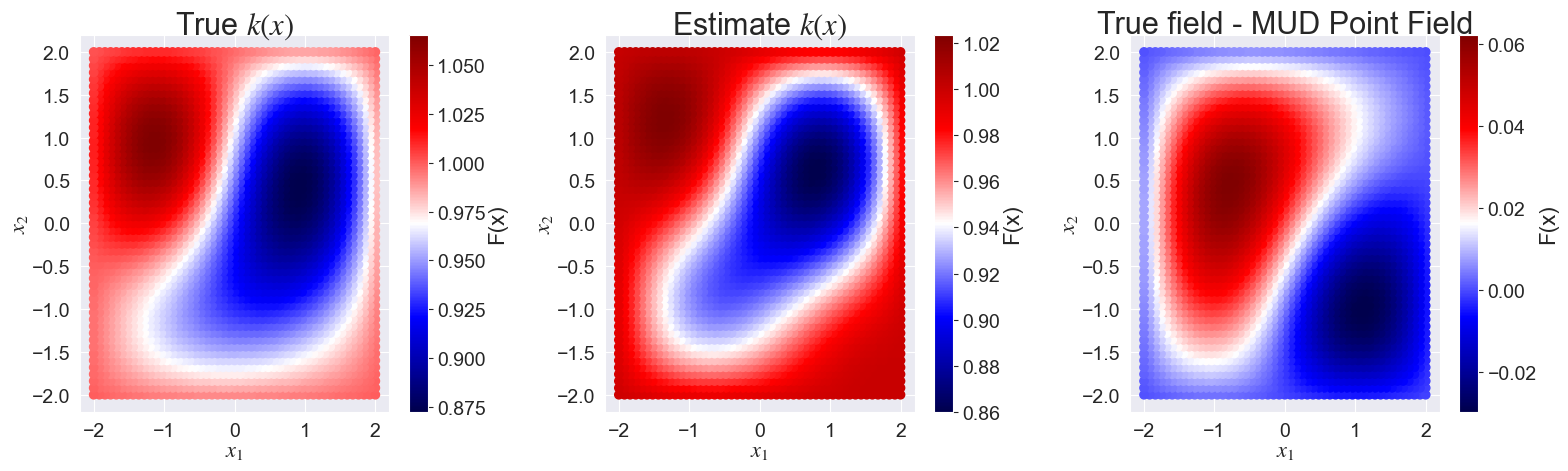

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

hm2.plot_field(ax=ax[0])
ax[0].set_title("True $k(x)$")
hm2.plot_field(field=prob.mud_point, ax=ax[1])
ax[1].set_title("Estimate $k(x)$")
hm2.plot_field(diff=prob.mud_point, ax=ax[2])
ax[2].set_title("True field - MUD Point Field")

fig.tight_layout()

In [ ]:
prob.it_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3  MUD_idx  \
0  0.941807  0.423399   0.712320   0.342105   0.693094   0.891946       58   
0  0.998670  0.012344   0.931816   0.294412   1.280604   2.716632       34   
0  0.987230  0.770167   1.743959   0.866069   0.928642   0.724075       29   
0  1.078473  0.738110   1.743959   0.866069   0.928642   0.724075       29   
0  0.817274  1.924596   0.086046   1.180829  -0.047040  -0.752936       35   
0  0.311481  2.489514   0.712320   0.342105   0.693094   0.891946       58   
0  1.444133  0.912239   0.869742  -0.148870   1.411826   1.559119       42   
0  0.492424  1.112835   0.712320   0.342105   0.693094   0.891946       58   
0  0.131915  3.530549   0.712320   0.342105   0.693094   0.891946       58   
0  2.792011  2.155546   0.935686   0.211990  -0.225779  -0.405773       97   

  pca_components           pca_mask  i  
0            [0]      range(0, 550)  0  
0            [0]   range(550, 1100)  1  
0            [0]  range(1100, 1650)  2  
0            [0]  range(1650, 2200)  3  
0            [0]  range(2200, 2750)  4  
0            [0]  range(2750, 3300)  5  
0            [0]  range(3300, 3850)  6  
0            [0]  range(3850, 4400)  7  
0            [0]  range(4400, 4950)  8  
0            [0]  range(4950, 5500)  9

In [36]:
its

array([0, 2, 4, 6, 8])

In [44]:
hm2.lam_true

array([ 0.64766395,  0.23596671, -0.56365636, -0.32909588])

In [69]:
import seaborn as sns

type(sns.color_palette())

seaborn.palettes._ColorPalette

In [93]:
import seaborn as sns
import itertools
from itertools import cycle


def plot_iterations(
    self,
    param_idx=0,
    iterations=None,
    lam_true=None,
    shade=True,
    color=None,
    linestyle=None,
    ax=None,
):
    """
    Plot PCA iterations.

    Plots the initial distribution, the iterative updates, and the final solution
    as stored in the self.it_results and self.pca_states attributes of the
    PCAMUDselflem object, which are updated during a PCAMUDselflem.solve_it() call.
    The iterative updates correspond to using a re-weighted sequential data-consistent
    update, also known as "offline" sequential estimation, since iterations
    are performed on a static set of data/simulations.

    Parameters
    ----------
    param_idx : int
        Index of the parameter to plot.
    iterations : list of int
        List of iterations to plot. If None, iterations are not plotted, just initial and final.
    lam_true : list of float
        True value of the parameter. Plotted as vertical orange line. If None, no true value is plotted.
    shade : bool
        If True, the iterative updates will be plotted with increasing transparancy as the iteration number
        increases. Otherwise all plotted with the same transparancy (alpha).
    color : str
        Color to use for all lines. If None, a color palette is used, so all lines are different colors.
    linestyle : str
        Linestyle to use for all lines. If None, linestyles are cycled through ['--','-.'] for the
        iterative updates. Initial is always plotted with ':' and final with '-'.
    ax :
        Matplotlib axes object to use. If None, a new figure and axes are created.

    Results
    -------
    ax : matplotlib.axes.Axes
        The matplotlib axes object used.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    # Plot initial distribution
    _, labels = self.plot_L(
        param_idx=param_idx,
        iteration=0,
        initial_kwargs={
            "color": "black",
            "linestyle": ":",
            "label": "$\pi^\mathrm{init}$",
        },
        update_kwargs=None,
        mud_kwargs=None,
        lam_true=None,
        ax=ax,
    )

    if isinstance(color, str):
        colors = [color] * (len(iterations) + 1)
    else:
        colors = sns.color_palette(None, len(iterations) + 1)

    # Plot iterative updates, for each iteration specified
    if iterations is not None:
        ls = ["--", "-."]
        ls = [linestyle] * (len(iterations) + 1) if linestyle is not None else ls
        linecycler = cycle(ls)

        alphas = np.ones(len(its)) if not shade else np.linspace(0.1, 0.9, len(its))
        line_opts = {"fill": False}
        for i, it in enumerate(iterations):
            line_opts["alpha"] = alphas[i]
            line_opts["label"] = f"$\pi^\mathrm{{up}}_{{i}}$"
            line_opts["color"] = colors[i]
            line_opts["linestyle"] = next(linecycler)
            _, l = self.plot_L(
                param_idx=param_idx,
                iteration=it,
                initial_kwargs=None,
                update_kwargs=line_opts,
                mud_kwargs=None,
                lam_true=None,
                ax=ax,
            )
            labels += l

    # Plot final solution, with mud argument and true lambda
    line_opts = {"fill": True}
    line_opts["label"] = f"$\pi^\mathrm{{up}}$"
    line_opts["linestyle"] = "-"
    line_opts["color"] = colors[-1]
    mud_args = {"alpha": 1.0, "linestyle": "--", "label": "$\lambda^\mathrm{MUD}$"}
    # if 'color' in kwargs.keys():
    #     mud_args['color'] = kwargs['color']
    _, l = self.plot_L(
        param_idx=param_idx,
        iteration=len(self.it_results) - 1,
        initial_kwargs=None,
        update_kwargs=line_opts,
        mud_kwargs=mud_args,
        lam_true=lam_true,
        ax=ax,
    )
    labels += l
    ax.legend(labels=labels, loc="upper right", fontsize=14)

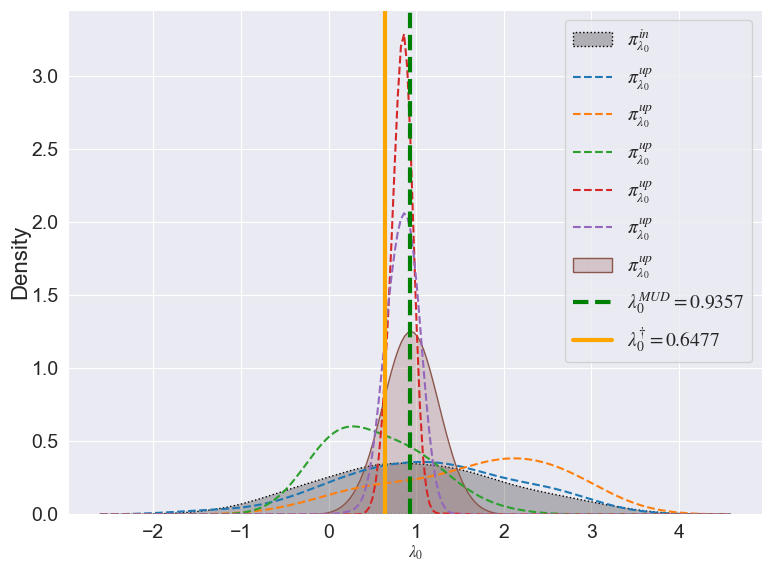

In [94]:
plot_iterations(
    prob,
    param_idx=0,
    iterations=np.arange(0, len(prob.it_results) - 1, 2),
    lam_true=[hm2.lam_true],
    shade=False,
    linestyle="--",
)

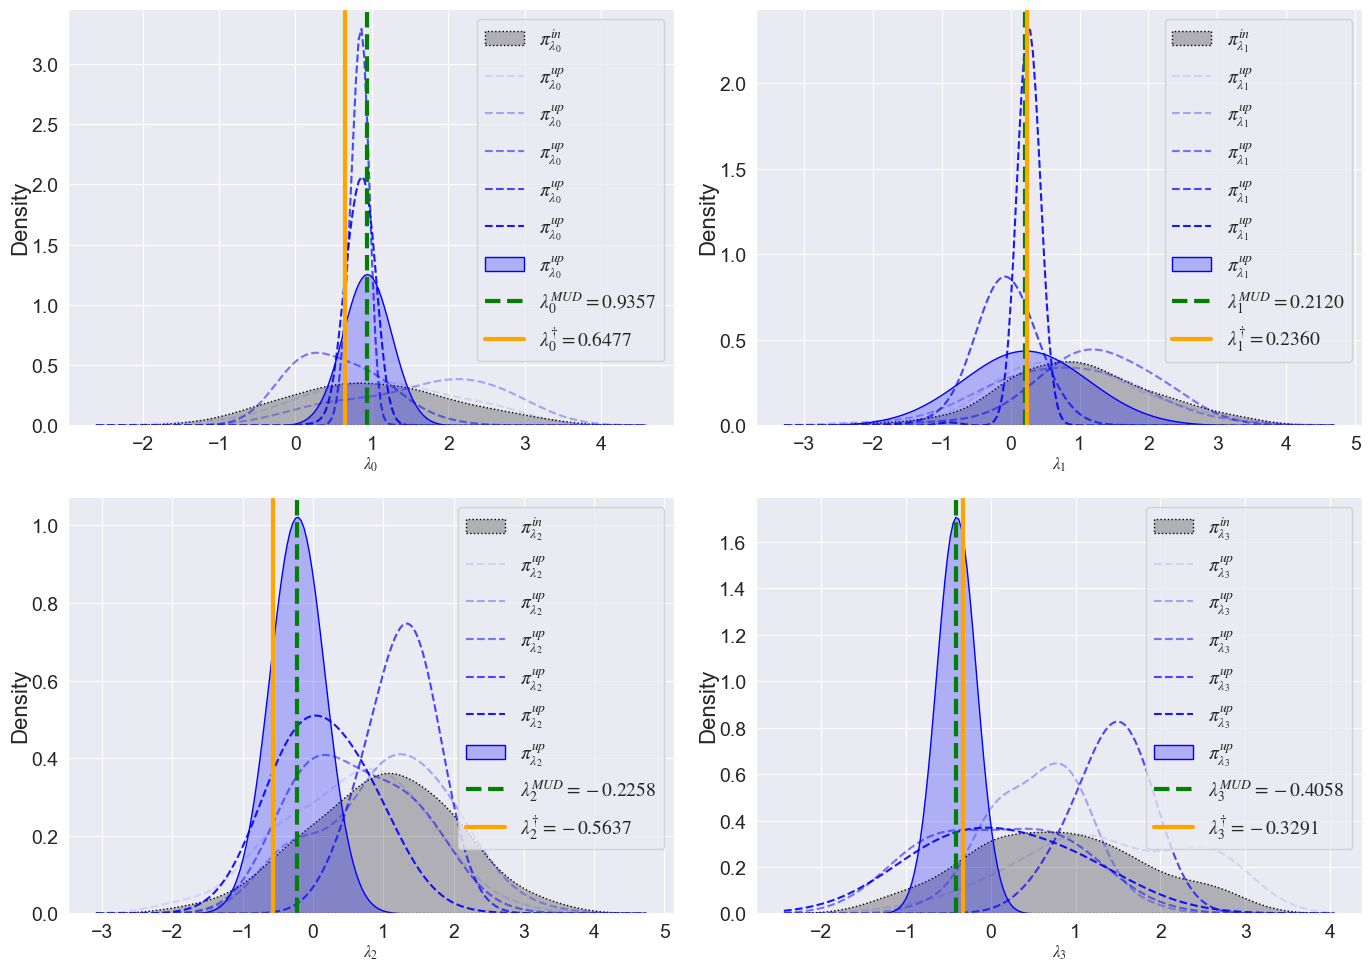

In [90]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, ax in enumerate(axs.flatten()):
    plot_iterations(
        prob,
        param_idx=i,
        iterations=np.arange(0, len(prob.it_results) - 1, 2),
        lam_true=[hm2.lam_true],
        shade=True,
        color="blue",
        linestyle="--",
        ax=ax,
    )

# Parameter Estimation Problem - 10 Dimensional

In [4]:
class ForcingFunction:
    def __init__(self):
        self.t = 0.0

    def eval(self, x):
        # Added some spatial variation here. Expression is sin(t)*x
        return np.full(
            x.shape[1],
            np.sin(2 * np.pi * self.t) * x[0] + 2 * np.sin(6 * np.pi * self.t) * x[1],
        )


enable_log(level="DEBUG")
hm_3 = HeatModel(
    x0=None,
    t0=0.0,
    measurement_noise=0.05,
    solve_ts=0.0001,
    sample_ts=0.1,
    nx=50,
    ny=50,
    mean=1.0,
    std_dev=1.0,
    length_scales=[0.1, 0.1],
    nmodes=10,
    true_k_x=None,
    max_states=500,
    forcing_expression=ForcingFunction(),
)

[07/31/23 17:43:33] INFO     Logger initialized                                                           ]8;id=516533;file:///Users/carlos/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=500812;file:///Users/carlos/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    DEBUG    Setting up simulation                                                 ]8;id=294346;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=862889;file:///Users/carlos/repos/pyDCI/src/pydci/examples/heat_model.py#91\91]8;;\

[07/31/23 17:43:40] DEBUG    State idxs set at: None                                                    ]8;id=737501;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=274871;file:///Users/carlos/repos/pyDCI/src/pydci/Model.py#89\89]8;;\

In [5]:
hm_3.lam_true

array([-0.64644406, -0.01549523, -0.37668279,  2.06648842, -0.78282961,
       -0.52980457,  0.01711592, -0.85698592, -1.64393602, -0.63882098])

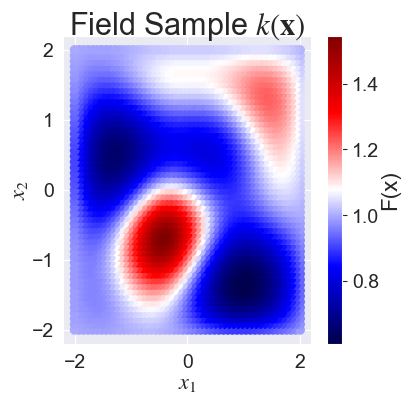

In [33]:
hm_3.plot_field()

In [ ]:
hm_3.get_data(1.0)

KeyboardInterrupt: 

In [7]:
from pydci.log import logger
from scipy.stats import multivariate_normal, uniform


def get_gaussian_initial_samples(self, mean=1.0, std_dev=1.0, num_samples=10):
    """
    Generate initial samples from uniform distribution over domain set by
    `self.set_domain`.
    """
    # Draw from n-dimensional Gaussian centered at `mean` with `std_dev` variance
    # Dimension equal to dimension of `self.n_params`
    logger.info(
        f"Drawing {num_samples} from multivariate normal at:\n"
        + f"\tmean: {mean}\n\tstd_dev: {std_dev}"
    )
    mean = np.ones(self.n_params) * mean if isinstance(mean, (int, float)) else mean
    std_dev = (
        np.ones(self.n_params) * std_dev
        if isinstance(std_dev, (int, float))
        else std_dev
    )
    pi_in = multivariate_normal(mean=mean, cov=std_dev)
    samples = pi_in.rvs(size=num_samples)
    return pi_in, samples

In [45]:
num_samples = 500
pi_in, samples = get_gaussian_initial_samples(hm_3, num_samples=num_samples)
samples.shape

[07/31/23 18:02:48] INFO     Drawing 500 from multivariate normal at:                              ]8;id=358995;file:///var/folders/_1/y1tmd_l95j903jlk5yydl1f40000gn/T/ipykernel_52027/3351901359.py\3351901359.py]8;;\:]8;id=20328;file:///var/folders/_1/y1tmd_l95j903jlk5yydl1f40000gn/T/ipykernel_52027/3351901359.py#16\16]8;;\
                                     mean: 1.0                                                                     
                                     std_dev: 1.0                                                                  

(500, 10)

In [47]:
disable_log()
hm_3.forward_solve(samples, restart=True)

In [48]:
from pydci import PCAMUDProblem
from pydci.utils import get_df

measurements = get_df(hm_3.data[-1].dropna(), "q_lam_obs", hm_3.n_sensors)
measurements, measurements.shape

(array([[-0.00317942, -0.02755138,  0.07319754, ...,  0.02780154,
         -0.07817695,  0.02981863],
        [ 0.02412786,  0.07835142, -0.07532857, ...,  0.14566627,
          0.09203445,  0.04648463],
        [ 0.02867066, -0.00996445,  0.00710787, ..., -0.06938206,
         -0.01573445, -0.01376611],
        ...,
        [-0.01812432,  0.06861213, -0.0536534 , ...,  0.13982382,
          0.07208353,  0.09487232],
        [-0.02852655,  0.01385533,  0.11276158, ...,  0.04194105,
          0.06295833,  0.025753  ],
        [-0.02217587,  0.04708192, -0.02650854, ..., -0.0227698 ,
          0.03784738,  0.01685407]]),
 (11, 500))

In [49]:
measurements.ravel().shape

(5500,)

In [64]:
disable_log()
prob = PCAMUDProblem(
    hm_3.samples[-1], measurements.ravel(), hm_3.measurement_noise, pi_in=pi_in
)
prob.solve_it(pca_components=[[0, 1, 2]], pca_splits=10, exp_thresh=1e10)
prob.result

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  lam_MUD_3  lam_MUD_4  \
0  0.226825  2.068131  -0.480902   0.836184   1.307526   1.604113  -0.588028   

   lam_MUD_5  lam_MUD_6  lam_MUD_7  lam_MUD_8  lam_MUD_9  MUD_idx  \
0  -0.512855   0.544227   0.769523   0.176435  -0.744277      239   

  pca_components           pca_mask  i  
0      [0, 1, 2]  range(4950, 5500)  9

In [65]:
prob.mud_point

array([-0.48090168,  0.83618424,  1.30752574,  1.60411332, -0.58802756,
       -0.51285453,  0.54422699,  0.76952275,  0.17643451, -0.74427653])

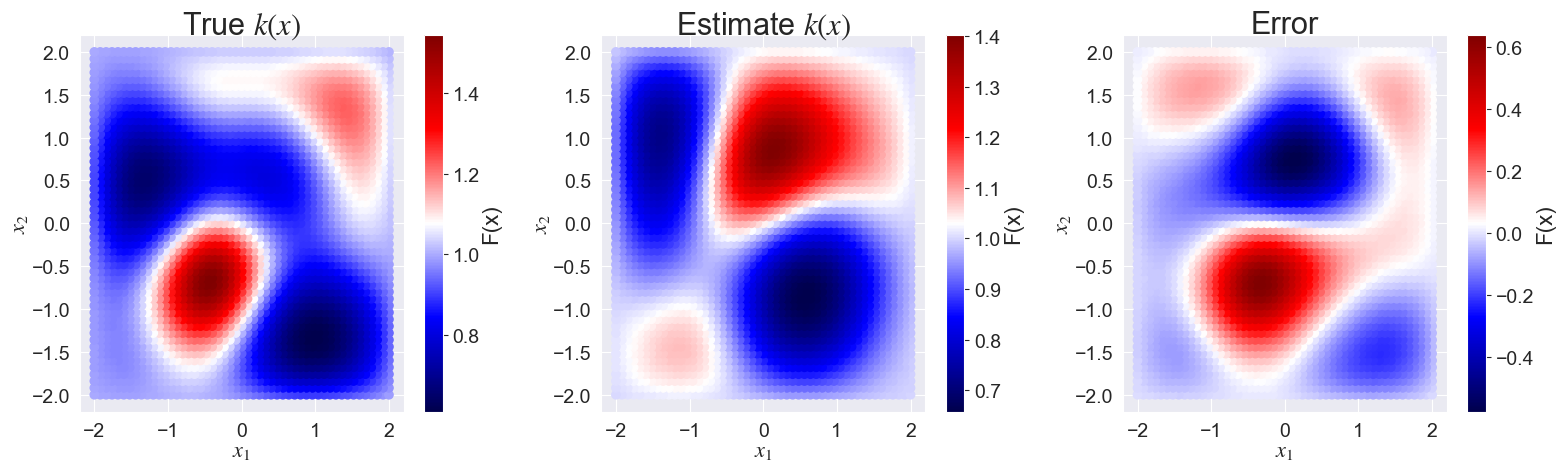

In [68]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

hm_3.plot_field(ax=ax[0])
ax[0].set_title("True $k(x)$")
hm_3.plot_field(field=prob.mud_point, ax=ax[1])
ax[1].set_title("Estimate $k(x)$")
hm_3.plot_field(diff=prob.mud_point, ax=ax[2])
ax[2].set_title("Error")

fig.tight_layout()

### Second iteration

In [70]:
hm_3.get_data(1.0)

In [73]:
measurements = get_df(hm_3.data[-1].dropna(), "q_lam_obs", hm_3.n_sensors)
measurements, measurements.shape

(array([[ 0.01483737,  0.06972236,  0.01876941, ..., -0.09672661,
          0.00149668, -0.02514891],
        [ 0.06940723,  0.09757674,  0.00500334, ...,  0.13613502,
         -0.04941342,  0.08377173],
        [ 0.04789538, -0.02190484, -0.09207588, ...,  0.09699546,
          0.03104305,  0.03871062],
        ...,
        [-0.02910159,  0.0222603 , -0.10658916, ...,  0.05397587,
          0.13039127,  0.14793121],
        [ 0.09401623,  0.05985476, -0.05636157, ...,  0.05626951,
          0.04942577,  0.03040665],
        [-0.07613814, -0.07867057,  0.05112792, ..., -0.07183673,
          0.04447727, -0.01671055]]),
 (11, 500))

In [71]:
samples = prob.sample_dist(num_samples=500)
pi_in = prob.dists["pi_up"]

In [74]:
disable_log()
hm_3.forward_solve(samples, restart=True)

Solving model sample set: |██▉                 | ▃▅▇ 73/500 [15%] in 9:13 (~54:26, 0.1/s)                               

# Example from https://fenicsproject.discourse.group/t/equivalent-for-expression-in-dolfinx/2641/12

Used this example to figure out how to set a time dependent forcing function:

In [42]:
from dolfinx import mesh, fem
from dolfinx.fem import FunctionSpace, Function, Constant
from ufl import TestFunction, dx, inner
import numpy as np
from mpi4py import MPI


class MyExpression:
    def __init__(self):
        self.t = 0.0

    def eval(self, x):
        # Added some spatial variation here. Expression is sin(t)*x
        return np.full(x.shape[1], np.sin(self.t) * x[0])


def test():
    """
    Test example from
    https://fenicsproject.discourse.group/t/equivalent-for-expression-in-dolfinx/2641/12
    """
    # If your Expression is not spatially dependent, use Constant
    # f = Constant(mesh, 0)
    # L = inner(f, v)*dx
    # f.value = np.sin(2)
    mesh = mesh.create_unit_square(MPI.COMM_WORLD, 10, 10)
    V = FunctionSpace(mesh, ("CG", 1))
    f = MyExpression()
    f.t = 0
    w = Function(V)
    v = TestFunction(V)
    L = inner(w, v) * dx
    w.interpolate(f.eval)
    fem.form(L)
    # print(fbem.petsc.assemble_vector(fem.form(L)))

# Old results

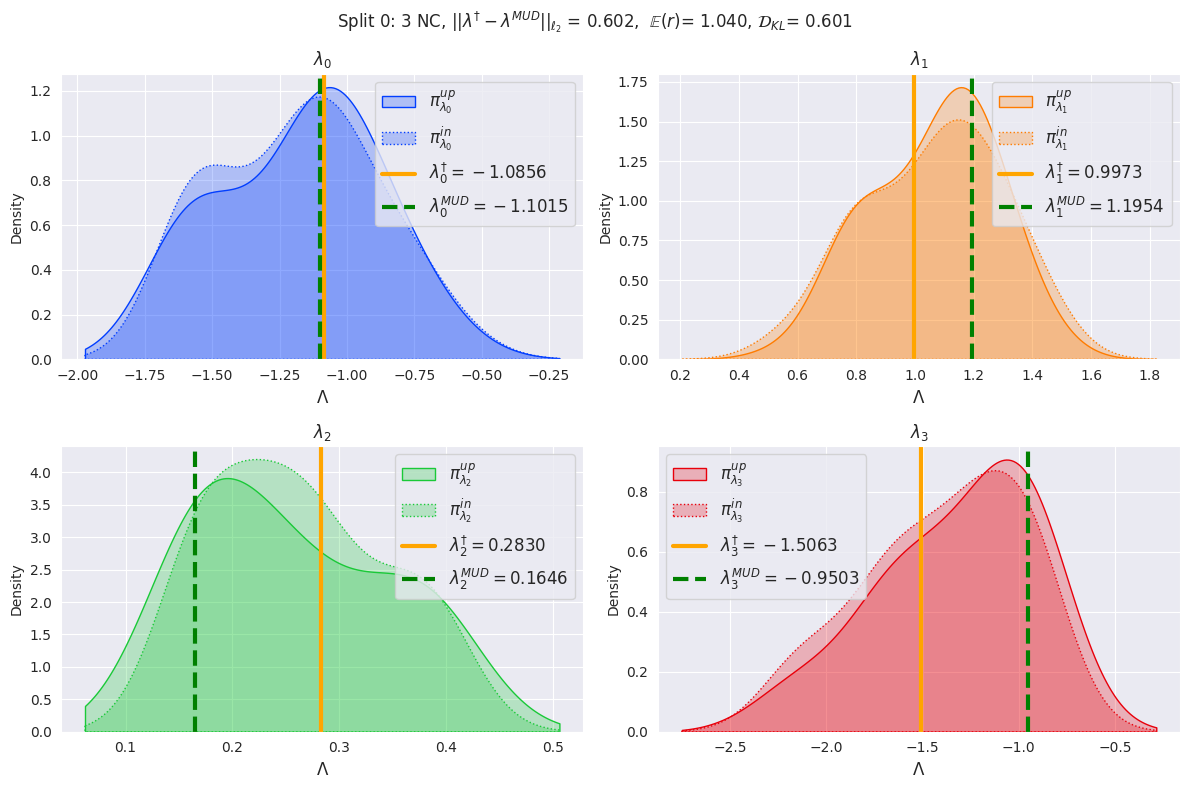

In [30]:
heat_model.probs[0].param_density_plots(lam_true=heat_model.lam_true)

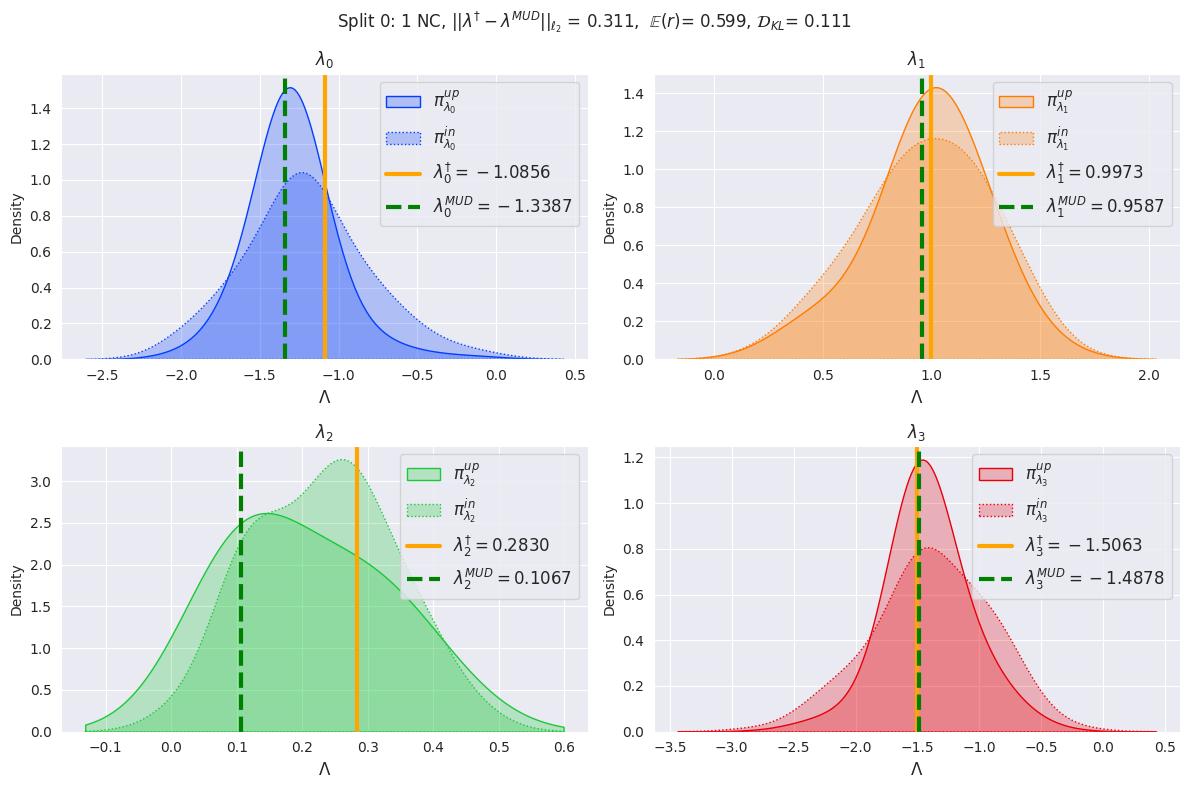

In [15]:
heat_model.probs[-1].param_density_plots(lam_true=heat_model.lam_true)

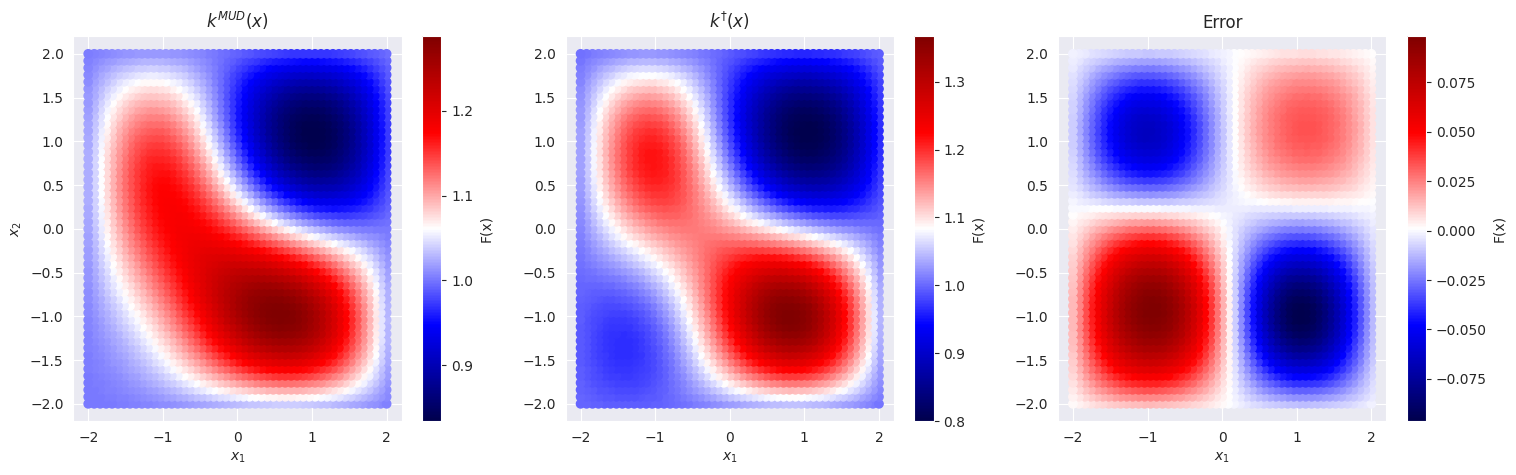

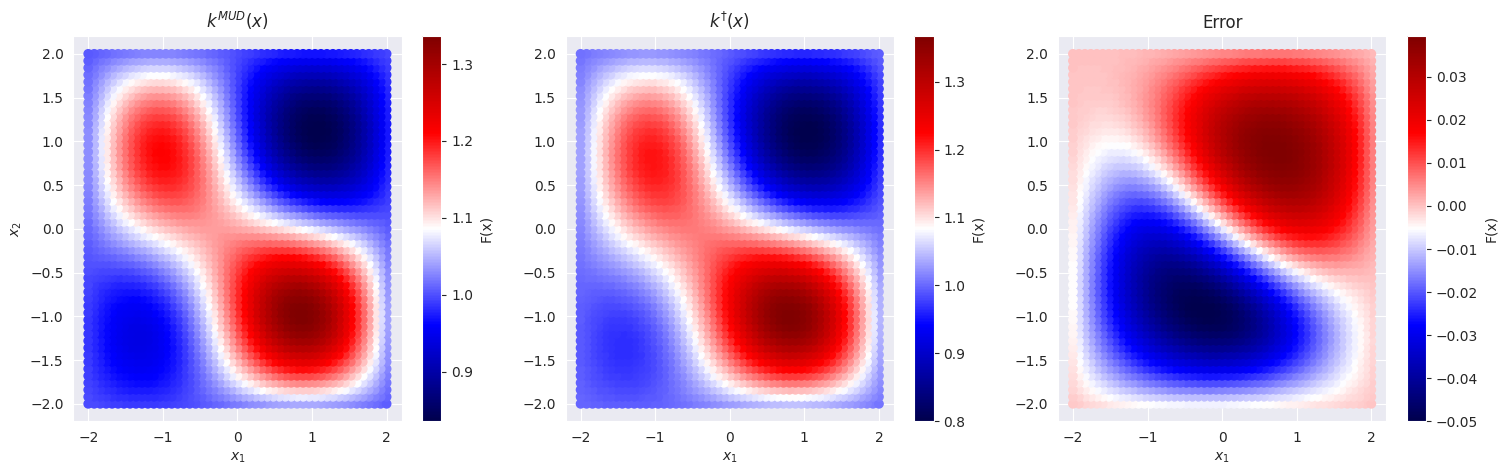

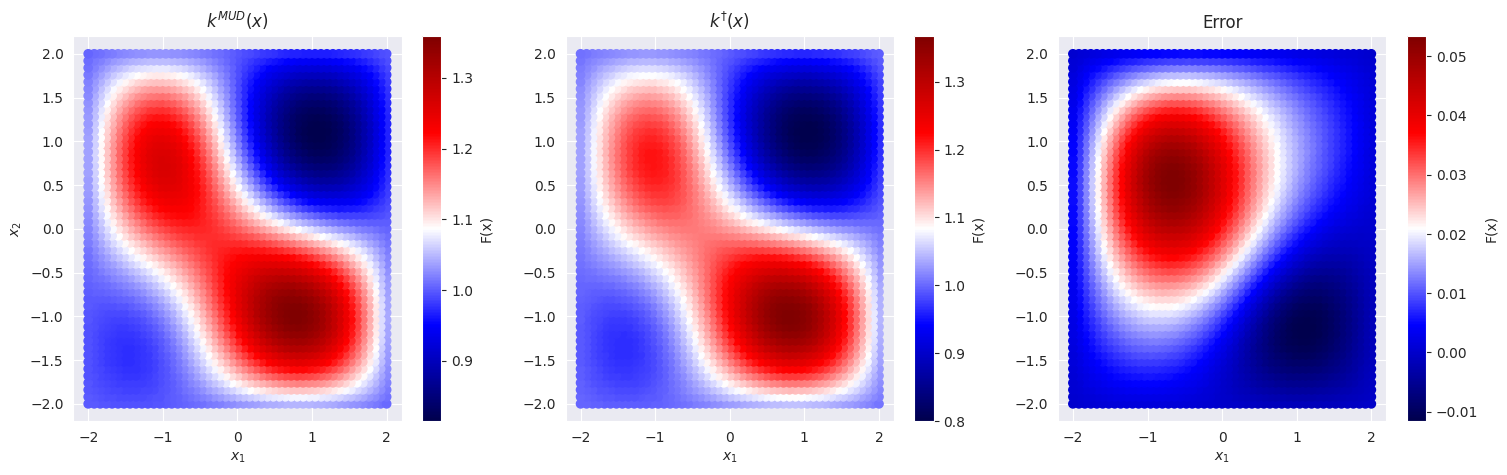

In [52]:
def plot_field_sol(heat_model, iteration=0):
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    heat_model.plot_field(field=heat_model.probs[iteration].mud_point, ax=ax[0])
    ax[0].set_title("$k^{MUD}(x)$")
    heat_model.plot_field(field=heat_model.lam_true, ax=ax[1])
    ax[1].set_title("$k^{\dagger}(x)$")
    ax[1].set_ylabel("")
    heat_model.plot_field(
        field=heat_model.probs[iteration].mud_point, diff=heat_model.lam_true, ax=ax[2]
    )
    ax[2].set_title("Error")
    ax[2].set_ylabel("")
    fig.tight_layout


for i in range(len(heat_model.probs)):
    plot_field_sol(heat_model, iteration=i)

# Num Modes = 10

Increase number of params

In [ ]:
np.random.seed(123)

importlib.reload(hm)
heat_model2 = hm.HeatModel(nmodes=10, max_states=50)
heat_model2.estimate_params([0.1, 0.2, 0.3, 0.4, 0.5], num_samples=100)

[04/21/23 06:13:30] WARNING  Pyvista not found                                                     ]8;id=37718;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=429962;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/examples/heat_model.py#24\24]8;;\

[04/21/23 06:13:36] INFO     Drawing 100 from uniform at:                                              ]8;id=675452;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=246421;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#251\251]8;;\
                                     loc: [-1.6284459   0.49867272  0.14148925 -2.25944207 -0.86790038             
                             0.82571827                                                                            
                              -3.64001887 -0.64336894  0.63296813 -1.3001106 ]                                     
                                     scale: [1.0856306  0.99734545 0.2829785  1.50629471 0.57860025                
                             1.65143654                                                                            
                              2.42667924 0.42891263 1.26593626 0.8667404 ]                                         

                    INFO     Starting iteration from 0.0 to 0.1                                        ]8;id=313636;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=163885;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#502\502]8;;\

[04/21/23 06:13:37] INFO     end_point: 0.0, [ 0.05486596  0.0069361  -0.04177233 ... -0.04220415      ]8;id=540862;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=198414;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#169\169]8;;\
                             -0.09562734                                                                           
                               0.00950829]                                                                         

Solving model sample set: |██████▋             | ▂▂▄ 33/100 [33%] in 27s (~57s, 

In [21]:
heat_model2.probs[-1].split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2   
split nc qoi_comb                                                        
0     1  0         0.565419  0.394487  -0.716982   1.679628   0.570665  \
      2  0         0.216006  0.524723  -0.590240   1.052694   0.300730   
      3  0         0.100875  0.494597  -0.590240   1.052694   0.300730   
      4  0         0.047903  0.434479  -0.590240   1.052694   0.300730   
      5  0         0.004259  0.525457  -1.180029   0.983414   0.447064   
      6  0         0.000816  1.018789  -0.575421   0.587249   0.040367   
      7  0         0.000460  1.079205  -0.575421   0.587249   0.040367   
      8  0         0.000084  1.540604  -1.098010   0.845948   0.011891   
      9  0         0.000043  1.800293  -1.098010   0.845948   0.011891   
      10 0         0.000014  1.646176  -0.716982   1.679628   0.570665   

                   lam_MUD_3  lam_MUD_4  lam_MUD_5  lam_MUD_6  lam_MUD_7   
split nc qoi_comb                                                          
0     1  0         -1.031287  -0.868979   2.037876  -4.117301  -0.362467  \
      2  0         -2.046628  -0.121896   2.232244  -2.191623  -0.118790   
      3  0         -2.046628  -0.121896   2.232244  -2.191623  -0.118790   
      4  0         -2.046628  -0.121896   2.232244  -2.191623  -0.118790   
      5  0         -0.574936  -0.539496   0.049587  -2.999707  -0.253100   
      6  0         -1.449368  -0.112898   3.304668  -2.442955  -0.456310   
      7  0         -1.449368  -0.112898   3.304668  -2.442955  -0.456310   
      8  0         -1.118476  -0.256675   1.915368  -0.902907  -0.470322   
      9  0         -1.118476  -0.256675   1.915368  -0.902907  -0.470322   
      10 0         -1.031287  -0.868979   2.037876  -4.117301  -0.362467   

                   lam_MUD_8  lam_MUD_9  predict_delta  within_thresh   
split nc qoi_comb                                                       
0     1  0          2.216736  -1.388417       0.434581           True  \
      2  0         -0.138245  -0.208366       0.783994          False   
      3  0         -0.138245  -0.208366       0.899125          False   
      4  0         -0.138245  -0.208366       0.952097          False   
      5  0          1.418394  -1.759890       0.995741          False   
      6  0          0.576993  -0.406242       0.999184          False   
      7  0          0.576993  -0.406242       0.999540          False   
      8  0          2.135069  -0.120351       0.999916          False   
      9  0          2.135069  -0.120351       0.999957          False   
      10 0          2.216736  -1.388417       0.999986          False   

                   closest  max_kl  min_kl  
split nc qoi_comb                           
0     1  0            True    True    True  
      2  0           False   False   False  
      3  0           False   False   False  
      4  0           False   False   False  
      5  0           False   False   False  
      6  0           False   False   False  
      7  0           False   False   False  
      8  0           False   False   False  
      9  0           False   False   False  
      10 0           False   False   False

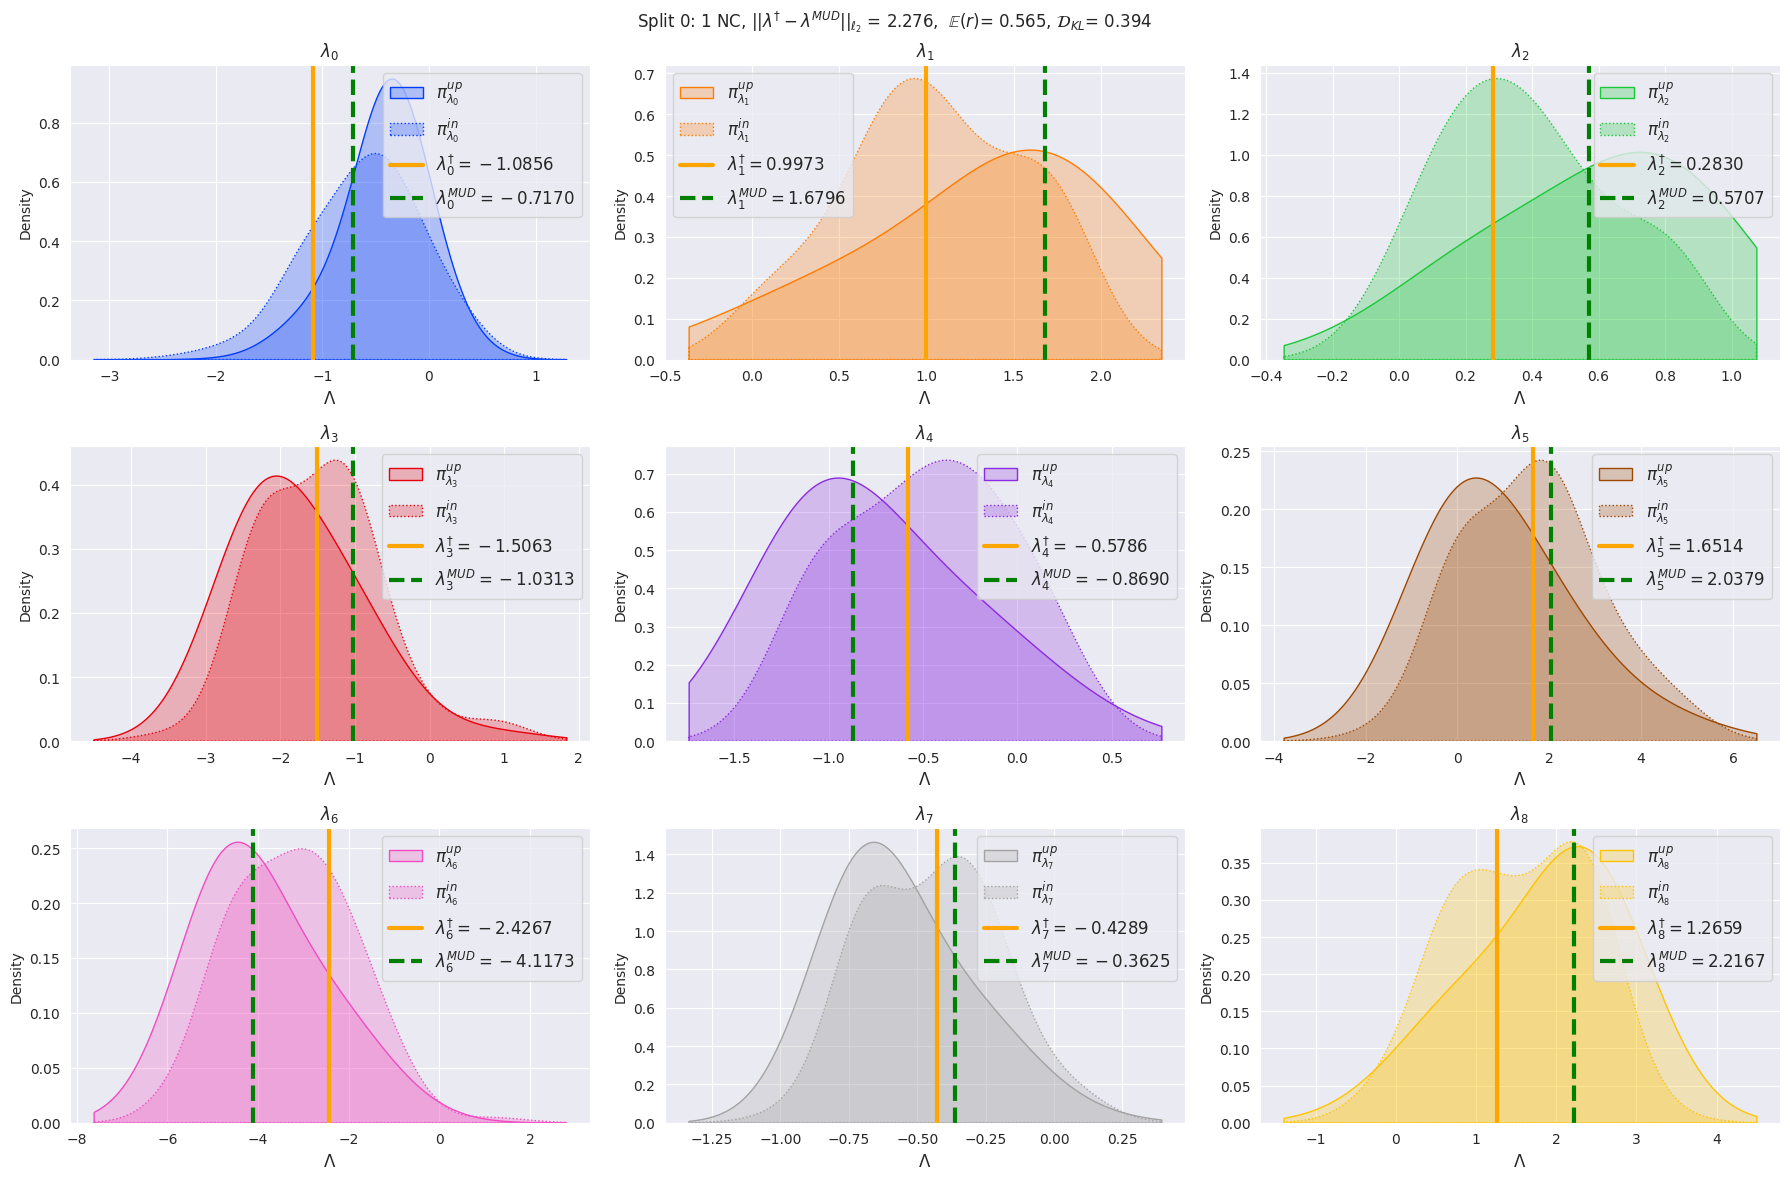

In [43]:
heat_model2.probs[-1].param_density_plots(lam_true=heat_model2.lam_true)

In [29]:
heat_model2.probs[-1].mud_point

array([-0.71698221,  1.67962815,  0.57066484, -1.031287  , -0.86897882,
        2.03787551, -4.11730066, -0.36246691,  2.21673642, -1.38841707])

<bound method Figure.tight_layout of <Figure size 1800x500 with 6 Axes>>

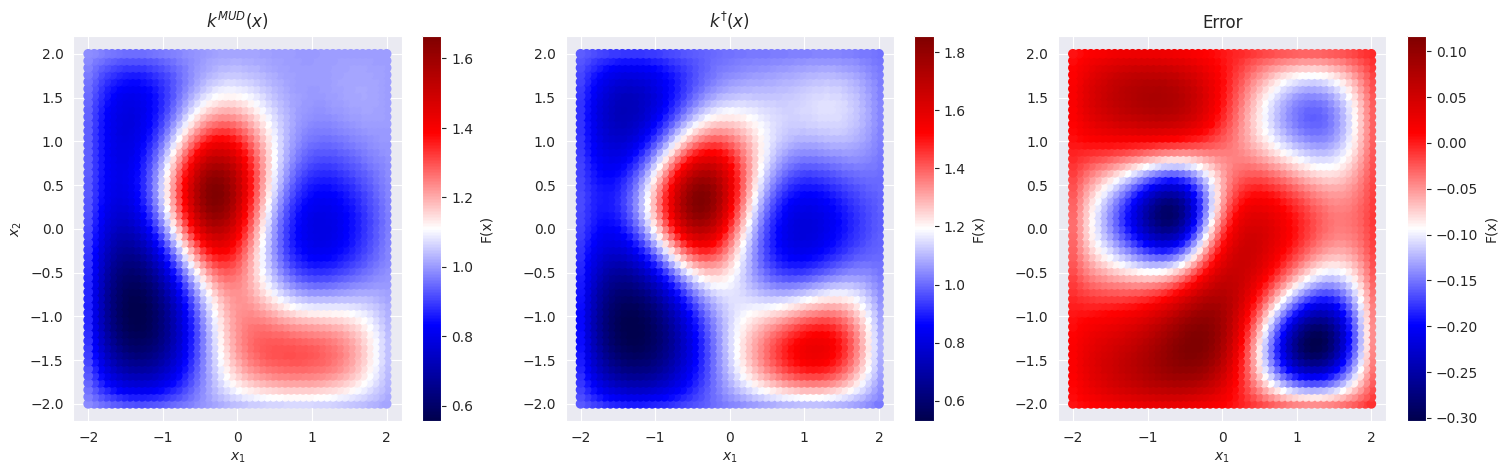

In [44]:
iteration = 0
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
heat_model2.plot_field(field=heat_model2.probs[iteration].mud_point, ax=ax[0])
ax[0].set_title("$k^{MUD}(x)$")
heat_model2.plot_field(field=heat_model2.lam_true, ax=ax[1])
ax[1].set_title("$k^{\dagger}(x)$")
ax[1].set_ylabel("")
heat_model2.plot_field(
    field=heat_model2.probs[iteration].mud_point, diff=heat_model2.lam_true, ax=ax[2]
)
ax[2].set_title("Error")
ax[2].set_ylabel("")
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1800x500 with 6 Axes>>

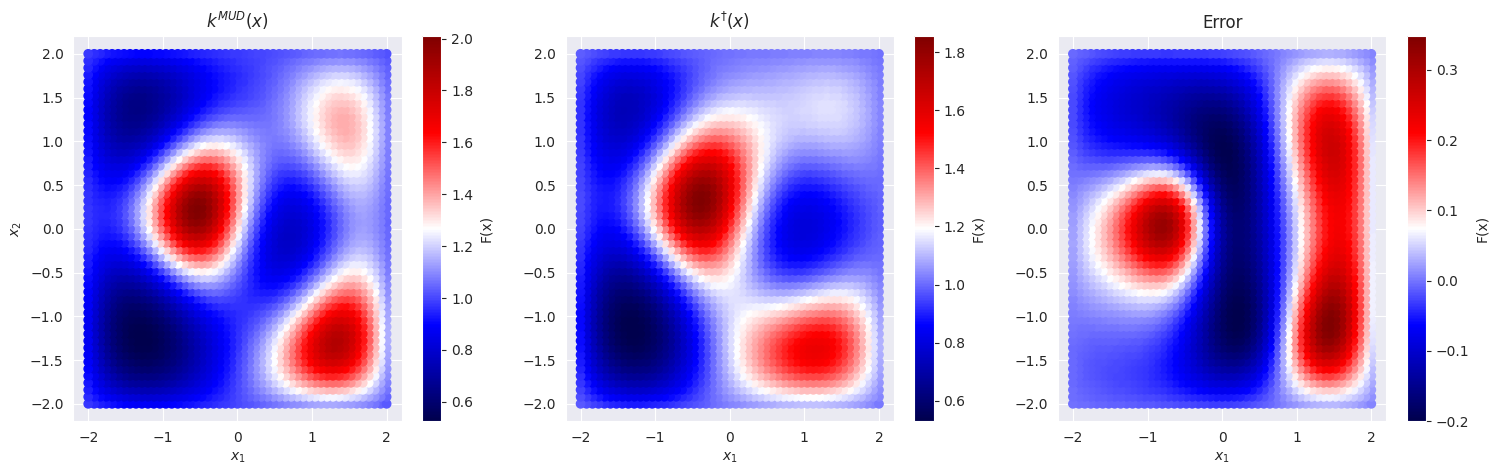

In [47]:
iteration = -2
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
heat_model2.plot_field(field=heat_model2.probs[iteration].mud_point, ax=ax[0])
ax[0].set_title("$k^{MUD}(x)$")
heat_model2.plot_field(field=heat_model2.lam_true, ax=ax[1])
ax[1].set_title("$k^{\dagger}(x)$")
ax[1].set_ylabel("")
heat_model2.plot_field(
    field=heat_model2.probs[iteration].mud_point, diff=heat_model2.lam_true, ax=ax[2]
)
ax[2].set_title("Error")
ax[2].set_ylabel("")
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1800x500 with 6 Axes>>

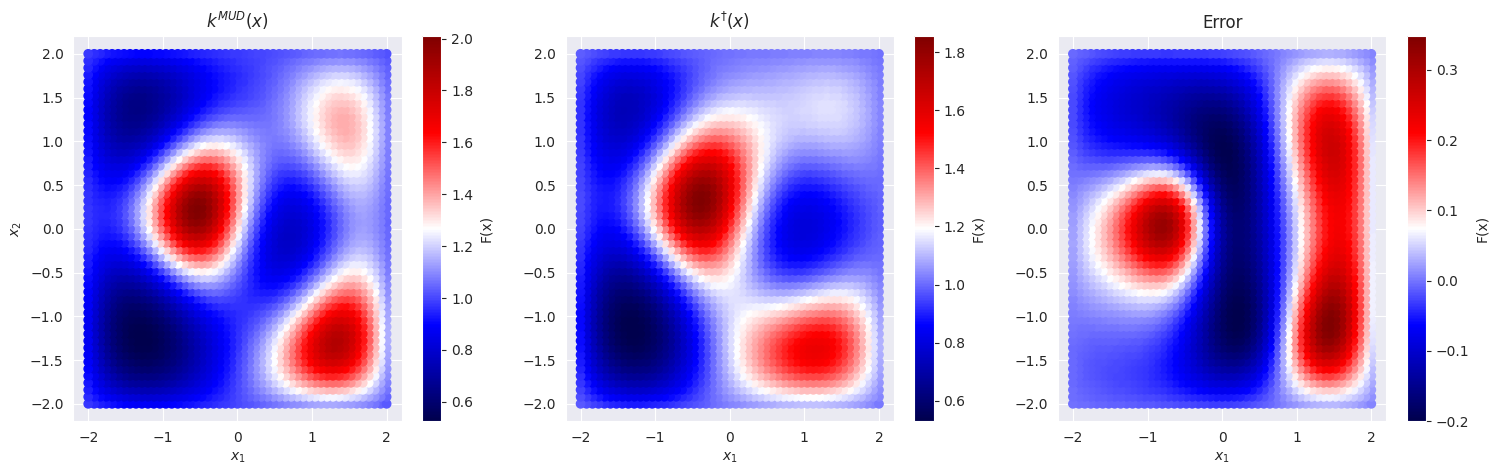

In [47]:
iteration = -1
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
heat_model2.plot_field(field=heat_model2.probs[iteration].mud_point, ax=ax[0])
ax[0].set_title("$k^{MUD}(x)$")
heat_model2.plot_field(field=heat_model2.lam_true, ax=ax[1])
ax[1].set_title("$k^{\dagger}(x)$")
ax[1].set_ylabel("")
heat_model2.plot_field(
    field=heat_model2.probs[iteration].mud_point, diff=heat_model2.lam_true, ax=ax[2]
)
ax[2].set_title("Error")
ax[2].set_ylabel("")
fig.tight_layout

## Residuals

Lets see the residual between observed and predicted for sample.
Note observed here has no noise yet.

In [12]:
idx = 1
gif_fname = f"s_{idx}.gif"
heat_model.output_gif(samples.loc[f"s_{idx}"], gif_fname, diff=sol)
Image(url=gif_fname)

|███████████████████████████████████████▊⚠︎ (!) 200/201 [100%] in 8.9s (22.44/s)                                         
